---

📅 **Published on:** October 20, 2024  
✍️ **Author:** Adnan Alaref  
📧 **Contact:** [adnanalaref](mailto:adnanalaref)

---


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 1: Import Library.  </p>***

In [185]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import metrics 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate

from scipy import stats
from numpy.linalg import cond
from scipy.stats import anderson
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 10)

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 2: Read DataSet.  </p>***

In [186]:
df_main = pd.read_csv(r'/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
df_main

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**The Target Column is `Selling_Price`**

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 3: Dataset Exploration | Overview.  </p>***

In [3]:
df_main.head(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350000,5.590000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750000,9.540000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250000,9.850000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850000,4.150000,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600000,6.870000,42450,Diesel,Dealer,Manual,0


In [4]:
df_main.tail().style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.500000,11.600000,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.000000,5.900000,60000,Petrol,Dealer,Manual,0
298,city,2009,3.350000,11.000000,87934,Petrol,Dealer,Manual,0
299,city,2017,11.500000,12.500000,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.300000,5.900000,5464,Petrol,Dealer,Manual,0


In [24]:
df_main.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
231,verna,2017,9.250000,9.400000,15001,Petrol,Dealer,Manual,0
8,ciaz,2016,8.750000,8.890000,20273,Diesel,Dealer,Manual,0
192,Hero Hunk,2007,0.200000,0.750000,49000,Petrol,Individual,Manual,1
187,Honda CB twister,2013,0.250000,0.510000,32000,Petrol,Individual,Manual,0
72,corolla altis,2013,7.450000,18.610000,56001,Petrol,Dealer,Manual,0


In [187]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


* Info our dataset tell us:
  - We see that, the dataset has `301 rows` and `9 columns`. Out of these 9 columns, **3 have integers classes** and **2 have floats classes** and **the rest have object (or character) classes**. 
  - An alternative way of quickly checking rows and columns is

In [188]:
df_main.shape

(301, 9)

***Numerical Columns Description:***

In [170]:
df_main.describe(include = 'number').T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
Year,301.000000,2013.627907,2.891554,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,301.000000,4.661296,5.082812,0.100000,0.900000,3.600000,6.000000,35.000000
Present_Price,301.000000,7.628472,8.644115,0.320000,1.200000,6.400000,9.900000,92.600000
Kms_Driven,301.000000,36947.205980,38886.883882,500.000000,15000.000000,32000.000000,48767.000000,500000.000000
Owner,301.000000,0.043189,0.247915,0.000000,0.000000,0.000000,0.000000,3.000000


***Object Columns Description:***

In [171]:
df_main.describe(include = 'object').T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 4: Data Preparation.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.1: Feature Subset Selection.  </p>***

In [189]:
len(df_main['Car_Name'].unique()) # Or df_main['Car_Name'].unique()

98

*Since Car_Name contains `98 unique categories`, and this number of categories is very high compared to the number of dataset samples, it is better to drop it:*

In [190]:
df_main.drop(labels = 'Car_Name' ,axis = 'columns' ,inplace=True)

In [191]:
print(df_main['Fuel_Type'].unique())
print(df_main['Seller_Type'].unique())
print(df_main['Transmission'].unique())
print(df_main['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [175]:
len(df_main.Selling_Price.value_counts())

156

In [11]:
pd.DataFrame(df_main.Selling_Price.value_counts()).T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Selling_Price,0.450000,0.600000,5.250000,4.500000,0.200000,4.750000,0.250000,0.400000,0.500000,4.000000,5.500000,1.050000,0.350000,3.000000,6.000000,0.750000,0.480000,1.150000,0.650000,3.100000,2.850000,1.100000,23.000000,1.350000,2.250000,7.750000,9.250000,1.200000,7.450000,0.300000,7.500000,11.250000,3.250000,2.650000,4.400000,2.900000,3.750000,0.900000,4.800000,3.900000,5.950000,6.250000,5.400000,3.950000,8.400000,0.550000,3.350000,0.420000,5.850000,7.250000,6.500000,4.900000,2.500000,0.380000,1.950000,4.950000,2.950000,4.100000,3.500000,2.550000,1.250000,8.250000,5.300000,2.750000,5.750000,3.150000,6.450000,11.750000,4.850000,0.100000,0.120000,7.900000,5.150000,7.200000,5.110000,2.700000,9.500000,8.550000,6.400000,10.110000,5.650000,7.400000,8.990000,2.100000,9.700000,8.650000,10.900000,6.700000,8.350000,3.650000,6.600000,9.150000,8.500000,10.250000,0.160000,5.000000,12.900000,5.200000,5.350000,2.000000,9.100000,11.450000,6.150000,0.150000,1.110000,0.170000,16.000000,1.500000,14.250000,4.350000,19.750000,33.000000,23.500000,18.750000,6.950000,19.990000,3.600000,18.000000,14.730000,14.900000,5.800000,4.650000,2.350000,4.150000,6.100000,6.850000,8.750000,6.750000,4.600000,14.500000,12.500000,0.180000,1.650000,0.270000,0.310000,0.510000,0.520000,0.720000,0.780000,0.800000,0.950000,1.000000,1.450000,1.700000,3.490000,1.750000,9.650000,7.050000,17.000000,20.750000,3.510000,3.800000,3.450000,5.900000,35.000000,11.500000
count,8,8,7,7,6,6,5,5,5,5,5,5,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [176]:
df_grouped = df_main.groupby(['Selling_Price']).max().sort_values(by='Selling_Price',ascending=False)
df_grouped.head(10).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Selling_Price,,,,,,,
35.000000,2010,92.600000,78000,Diesel,Dealer,Manual,0
33.000000,2017,36.230000,6000,Diesel,Dealer,Automatic,0
23.500000,2015,35.960000,47000,Diesel,Dealer,Automatic,0
23.000000,2017,30.610000,40000,Diesel,Dealer,Automatic,0
20.750000,2016,25.390000,29000,Diesel,Dealer,Automatic,0
19.990000,2014,35.960000,41000,Diesel,Dealer,Automatic,0
19.750000,2017,23.150000,11000,Petrol,Dealer,Automatic,0
18.750000,2014,35.960000,78000,Diesel,Dealer,Automatic,0
18.000000,2017,19.770000,15000,Diesel,Dealer,Automatic,0


In [192]:
#check proportion of target variable
prop_target = pd.DataFrame(df_main.Selling_Price.value_counts()/df_main.shape[0])
prop_target.T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Selling_Price,0.450000,0.600000,5.250000,4.500000,0.200000,4.750000,0.250000,0.400000,0.500000,4.000000,5.500000,1.050000,0.350000,3.000000,6.000000,0.750000,0.480000,1.150000,0.650000,3.100000,2.850000,1.100000,23.000000,1.350000,2.250000,7.750000,9.250000,1.200000,7.450000,0.300000,7.500000,11.250000,3.250000,2.650000,4.400000,2.900000,3.750000,0.900000,4.800000,3.900000,5.950000,6.250000,5.400000,3.950000,8.400000,0.550000,3.350000,0.420000,5.850000,7.250000,6.500000,4.900000,2.500000,0.380000,1.950000,4.950000,2.950000,4.100000,3.500000,2.550000,1.250000,8.250000,5.300000,2.750000,5.750000,3.150000,6.450000,11.750000,4.850000,0.100000,0.120000,7.900000,5.150000,7.200000,5.110000,2.700000,9.500000,8.550000,6.400000,10.110000,5.650000,7.400000,8.990000,2.100000,9.700000,8.650000,10.900000,6.700000,8.350000,3.650000,6.600000,9.150000,8.500000,10.250000,0.160000,5.000000,12.900000,5.200000,5.350000,2.000000,9.100000,11.450000,6.150000,0.150000,1.110000,0.170000,16.000000,1.500000,14.250000,4.350000,19.750000,33.000000,23.500000,18.750000,6.950000,19.990000,3.600000,18.000000,14.730000,14.900000,5.800000,4.650000,2.350000,4.150000,6.100000,6.850000,8.750000,6.750000,4.600000,14.500000,12.500000,0.180000,1.650000,0.270000,0.310000,0.510000,0.520000,0.720000,0.780000,0.800000,0.950000,1.000000,1.450000,1.700000,3.490000,1.750000,9.650000,7.050000,17.000000,20.750000,3.510000,3.800000,3.450000,5.900000,35.000000,11.500000
count,0.026578,0.026578,0.023256,0.023256,0.019934,0.019934,0.016611,0.016611,0.016611,0.016611,0.016611,0.016611,0.013289,0.013289,0.013289,0.013289,0.013289,0.013289,0.013289,0.013289,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322


**As see for example the  proportion of target variable:**
<br>
**45k &emsp; 0.026578%  
20k   &emsp; 0.019934%**
<br>***Name:   Selling_Price,  dtype: float64***</br>


***Make Filter over Dataset***

In [178]:
df_main[(df_main['Seller_Type'] == 'Dealer') & (df_main['Transmission'] == 'Manual')]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


***Let's create a cross tab of the `Selling_Price` variable with `Seller_Type` (Dealer,Individual) variable. With this, we'll try to understand the influence of Seller_Type on the Selling_Price variable.***

In [12]:
pd.crosstab(df_main['Seller_Type'], df_main['Selling_Price'],margins=True)

Selling_Price,0.1,0.12,0.15,0.16,0.17,0.18,0.2,0.25,0.27,0.3,...,18.0,18.75,19.75,19.99,20.75,23.0,23.5,33.0,35.0,All
Seller_Type,,,,,,,,,,,,,,,,,,,,,
Dealer,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,3,1,1,1,195
Individual,1,1,1,1,1,1,6,5,1,3,...,0,0,0,0,0,0,0,0,0,106
All,1,1,1,1,1,1,6,5,1,3,...,1,1,1,1,1,3,1,1,1,301


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.2: Feature Transformation.  </p>***

In [179]:
df_main.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

***ِThe Car Age is more than 1 year old, which is the year of manufacture.***

In [193]:
df_main.insert(0,'Age',df_main.Year.max()+1 - df_main.Year)
df_main.drop(labels = 'Year' ,axis = 'columns',inplace=True)
df_main.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.350000,5.590000,27000,Petrol,Dealer,Manual,0
1,6,4.750000,9.540000,43000,Diesel,Dealer,Manual,0


In [181]:
pd.DataFrame(df_main.columns).T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,0,1,2,3,4,5,6,7
0,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.3: Outlier Detection.  </p>***

[<center><img src="https://www.mdpi.com/geotechnics/geotechnics-03-00022/article_deploy/html/images/geotechnics-03-00022-g003-550.jpg" 
  width="500"
  height="1000"></center>](Outlier.jpg)

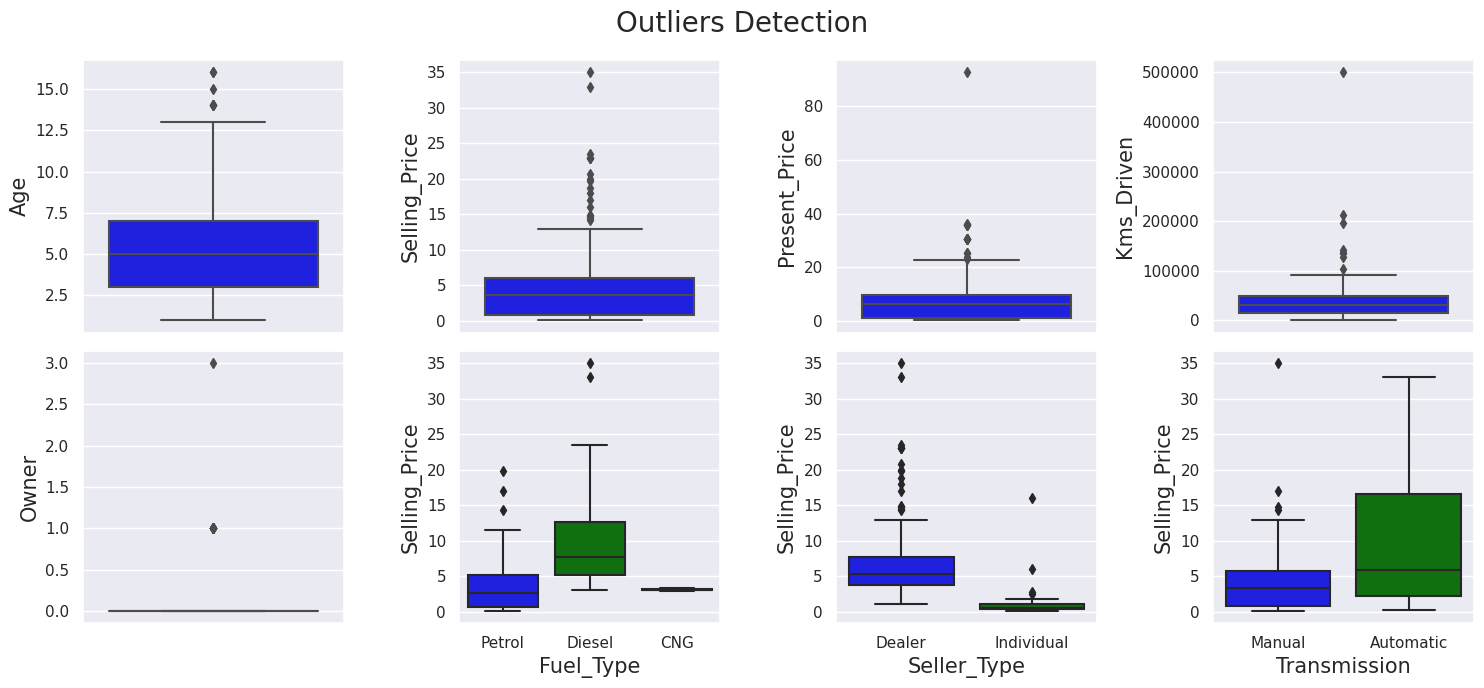

In [194]:
sns.set_style('darkgrid')
Color = ['blue','green','orange']
#Color number equal max cartigory feature number
CustomPalette = sns.set_palette(sns.color_palette(Color)) 

#Make Numerical features first then catigorical features
#Features = ['Age','Selling_Price','Present_Price','Kms_Driven','Owner','Seller_Type','Fuel_Type','Transmission'] Or
Features = np.concatenate([df_main.select_dtypes(exclude = 'object').columns.values,
                                             df_main.select_dtypes(include='object').columns.values])

fig ,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,7) ,dpi=100)
'''
A dpi of 100 means that the plot will have 100 dots (or pixels) per inch.
Higher dpi values result in higher resolution (more detailed) images.
''' 
for i,col in enumerate(Features):
    x = i//4
    y = i%4
    
    if i<5:
        sns.boxplot(data=df_main ,y=col ,ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df_main ,x=col ,y='Selling_Price' ,ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.suptitle('Outliers Detection',fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
Features = ['Age','Selling_Price','Present_Price','Kms_Driven','Owner','Fuel_Type','Seller_Type','Transmission']
fig = make_subplots(rows =2 ,cols = 4)

i=0
for row in range(1,3):
    for col in range(1,5):
        fig.add_trace(go.Box(y=df_main[Features[i]],name = Features[i]),row=row,col=col)
        i+=1
        
fig.update_layout(height=700 ,showlegend=True , width=1000 ,title={
                                                    'text': 'Trace Outliers Detection',  # Title text
                                                    'x': 0.5,                         # Position of the title (0: left, 1: right, 0.5: center)
                                                    'xanchor': 'center',              # Anchor title to the center
                                                    'yanchor': 'top'                  # Vertical alignment of the title
                                                    })
fig.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.4: Calculate Outliers By IQR.  </p>***

In [196]:
Outliers_data  = []
Outliers_Index = []
target_feature = 'Selling_Price'

# first calc outliers for Object data with Selling_Price
for col in df_main.select_dtypes(include = 'object').columns:
    for cat in df_main[col].unique(): # this return ex... ['Dealer', 'Individual'] 
        df_cur_cat = df_main[df_main[col]==cat]
        Q1 = np.percentile(df_cur_cat[target_feature],25)
        Q3 = np.percentile(df_cur_cat[target_feature],75)
        # Calc IQR 
        IQR = Q3 - Q1
        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        Outliers_samples = df_cur_cat[(df_cur_cat[target_feature] < lower_bound) | (df_cur_cat[target_feature] > upper_bound)]
        Outliers_data.extend(Outliers_samples.values.tolist())
        Outliers_Index.extend(Outliers_samples.index.tolist())

# Second calc outliers for Numerical data
for col in df_main.select_dtypes(include = 'number').columns:
        Q1 = np.percentile(df_main[col],25)
        Q3 = np.percentile(df_main[col],75)
        # Calc IQR 
        IQR = Q3 - Q1
        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        Outliers_samples = df_main[(df_main[col] < lower_bound) | (df_main[col] > upper_bound)]
        Outliers_data.extend(Outliers_samples.values.tolist())
        Outliers_Index.extend(Outliers_samples.index.tolist())
        
Outliers_Index = list(set(Outliers_Index))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(Outliers_Index), Outliers_Index))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


***Find maximum value in each numerical column to determine what data & index will be outlier Or removing***

In [197]:
pd.DataFrame((Outliers_data)).max()

0            16
1         35.00
2         92.60
3        500000
4        Petrol
5    Individual
6        Manual
7             3
dtype: object

***As we can see :*** 
- ***We will give all data label `Normal`.***
- ***And we will change a label to `Outlier` for data that falls inside Outliers_Index.***
- ***we will change a label to `Removing` for data with a `Selling_Price` _`index 1 in upove`_ greater than 33 and a _`Kms_Driven`  `index 3 in upove`_ greater than 400,000.***

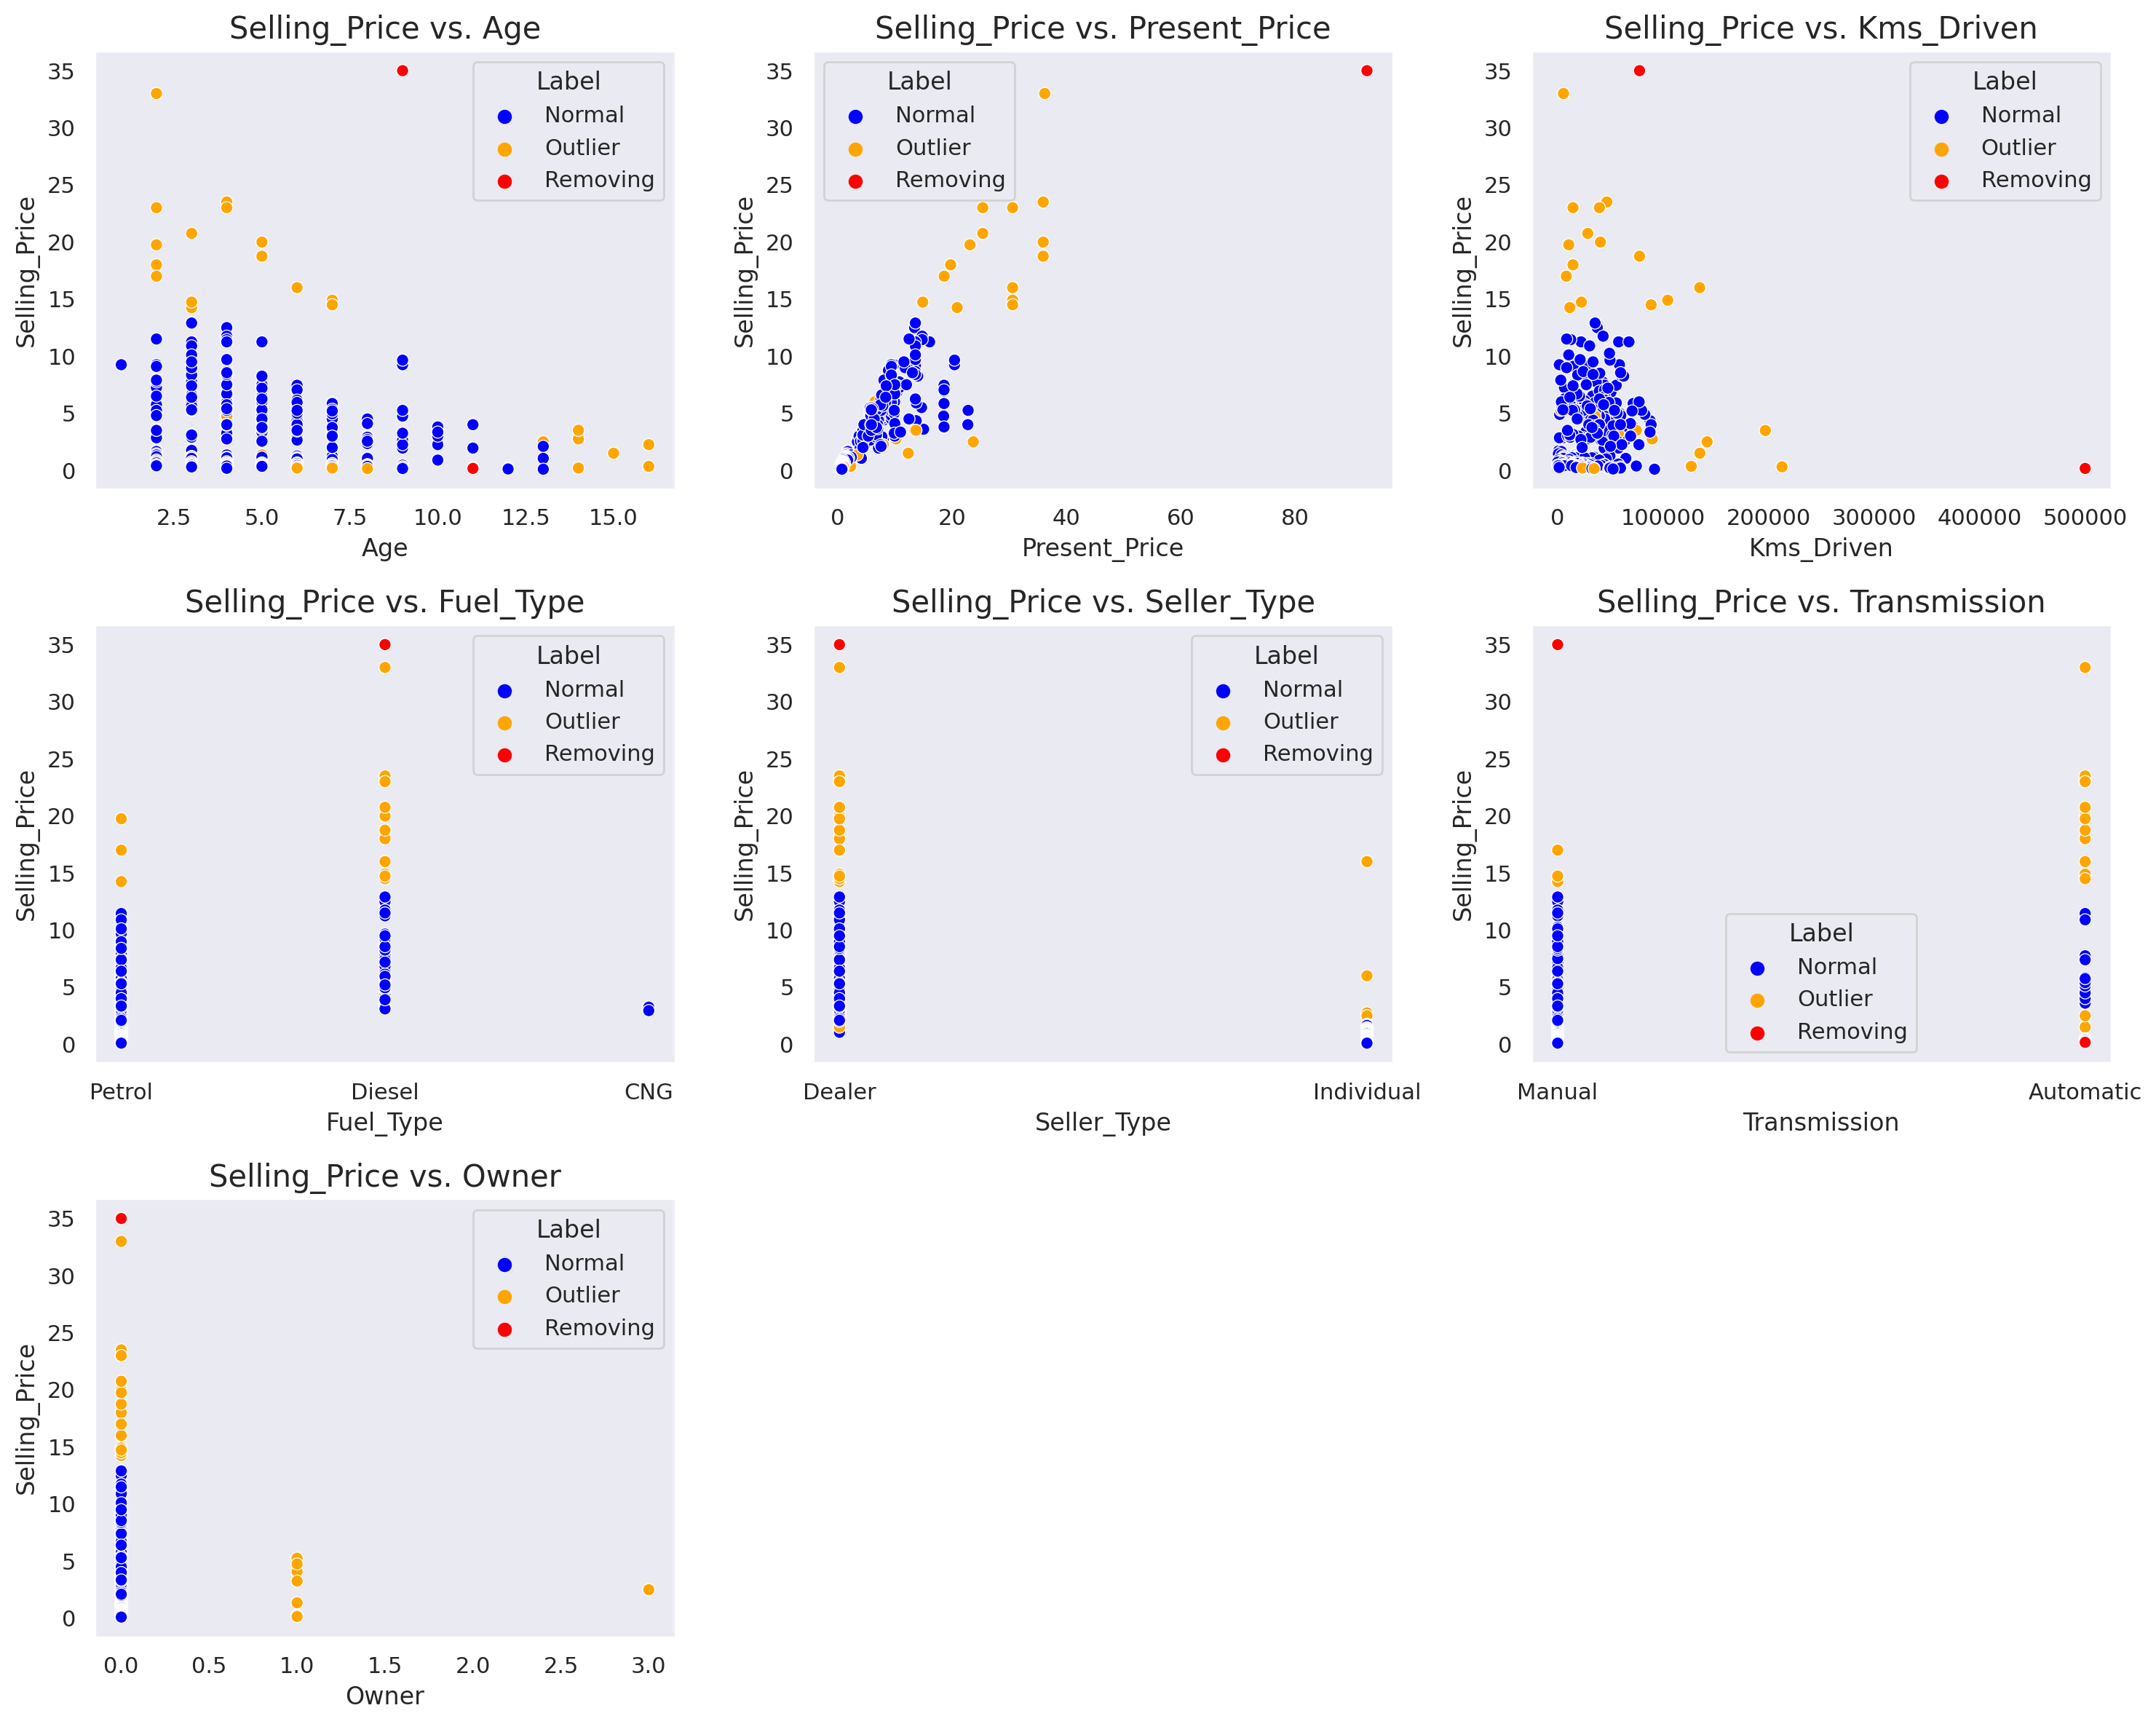

In [198]:
target = 'Selling_Price'
df_second = df_main.copy()
Features = df_second.columns.drop(labels = target)

# Outliers Labeling
df_second['Label'] = 'Normal'
df_second.loc[Outliers_Index,'Label'] = 'Outlier'

# Removing
Removing_Index = []
Removing_Index.extend(df_second[df_second[target]>33].index)
Removing_Index.extend(df_second[df_second['Kms_Driven']>400000].index)
df_second.loc[Removing_Index,'Label'] = 'Removing'

# Strat Plot
sns.set_style('darkgrid')
Colors = ['blue' ,'orange' ,'red']
Custom_palette = sns.set_palette(sns.color_palette(Colors))

fig ,ax = plt.subplots(nrows = 3 ,ncols = 3 ,figsize = (15,12) ,dpi = 200)
for i in range(len(Features)):
    x = i//3
    y = i%3
    sns.scatterplot(data = df_second ,x = Features[i] ,y = target ,hue = 'Label' , ax = ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, Features[i]), size = 15)
    ax[x,y].xaxis.label.set_size(12)
    ax[x,y].yaxis.label.set_size(12)
    ax[x,y].grid()
 
# Close plot on  
ax[2,1].axis('off')
ax[2,2].axis('off')

plt.tight_layout()
plt.show()

In [162]:
# dataframe with Label column that we create it upove
df_second.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Label
196,11,0.170000,0.520000,500000,Petrol,Individual,Automatic,0,Removing
39,16,2.250000,7.980000,62000,Petrol,Dealer,Manual,0,Outlier
278,3,6.000000,8.400000,4000,Petrol,Dealer,Manual,0,Normal
297,4,4.000000,5.900000,60000,Petrol,Dealer,Manual,0,Normal
169,4,0.400000,0.540000,14000,Petrol,Individual,Manual,0,Normal


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.5: Discover Missing Values.  </p>***

In [20]:
pd.DataFrame(df_main.isna().sum()).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,0
Age,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


***Not Found Any Misssing Values***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.6: Discover Duplicates.  </p>***

In [199]:
df_main[df_main.duplicated(keep=False)].style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.750000,10.790000,43000,Diesel,Dealer,Manual,0
17,3,7.750000,10.790000,43000,Diesel,Dealer,Manual,0
51,4,23.000000,30.610000,40000,Diesel,Dealer,Automatic,0
93,4,23.000000,30.610000,40000,Diesel,Dealer,Automatic,0


***We will not drop duplicted beacuse cars can have same features with others***

In [200]:
df_main.duplicated(keep=False).value_counts()

False    297
True       4
Name: count, dtype: int64

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.7: Drop Outliers.  </p>***

***We will reomving data with label `Removing`***

In [201]:
df_car = df_main.copy()
df_car.drop(Removing_Index ,inplace = True)
df_car.reset_index(drop = True ,inplace = True) 

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 5: EDA.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.1: Dataset variables analysis.  </p>***

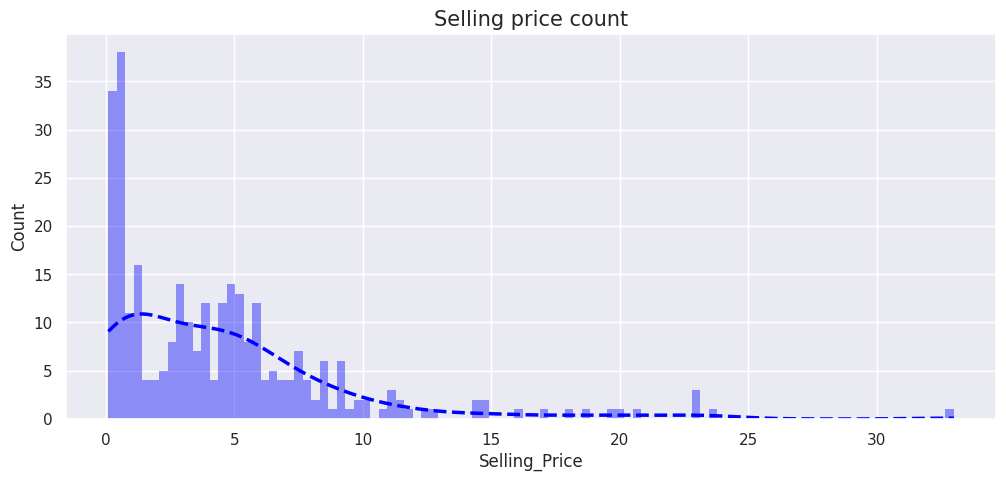

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
sns.histplot(data = df_car ,x = df_car.Selling_Price ,bins = 100 ,kde = True ,edgecolor = 'none' ,alpha = 0.4 ,line_kws = {'linestyle':'--','lw':2.5})
plt.title('Selling price count',fontsize = 15)
plt.xlabel('Selling_Price',fontsize = 12)
plt.ylabel('Count' ,fontsize =12)
plt.show()

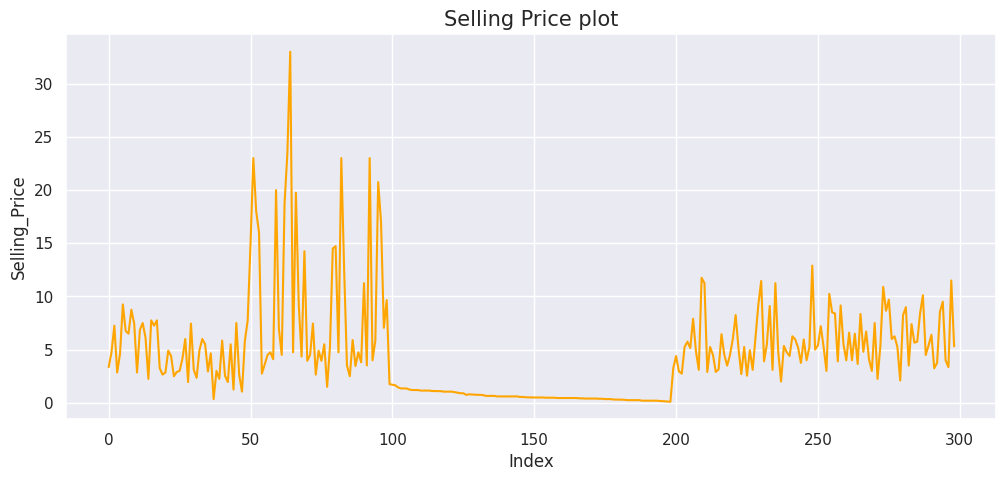

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
plt.plot(df_car.index ,df_car.Selling_Price ,color='orange')
plt.title('Selling Price plot',fontsize = 15)
plt.xlabel('Index' ,fontsize = 12)
plt.ylabel('Selling_Price' ,fontsize =12)
plt.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.2: Dataset Pairwise Plots.  </p>***

***Creates a grid of scatterplots (pairwise relationships) for all numerical columns in the DataFrame df_car. Each variable is plotted against every other variable, including itself.***
* Diagonal Plots: The diagonal in the grid usually contains histograms or KDE plots (Kernel Density Estimate) for each individual variable, showing their distributions.
- Off-Diagonal Plots: The off-diagonal plots contain scatterplots showing relationships between pairs of variables.

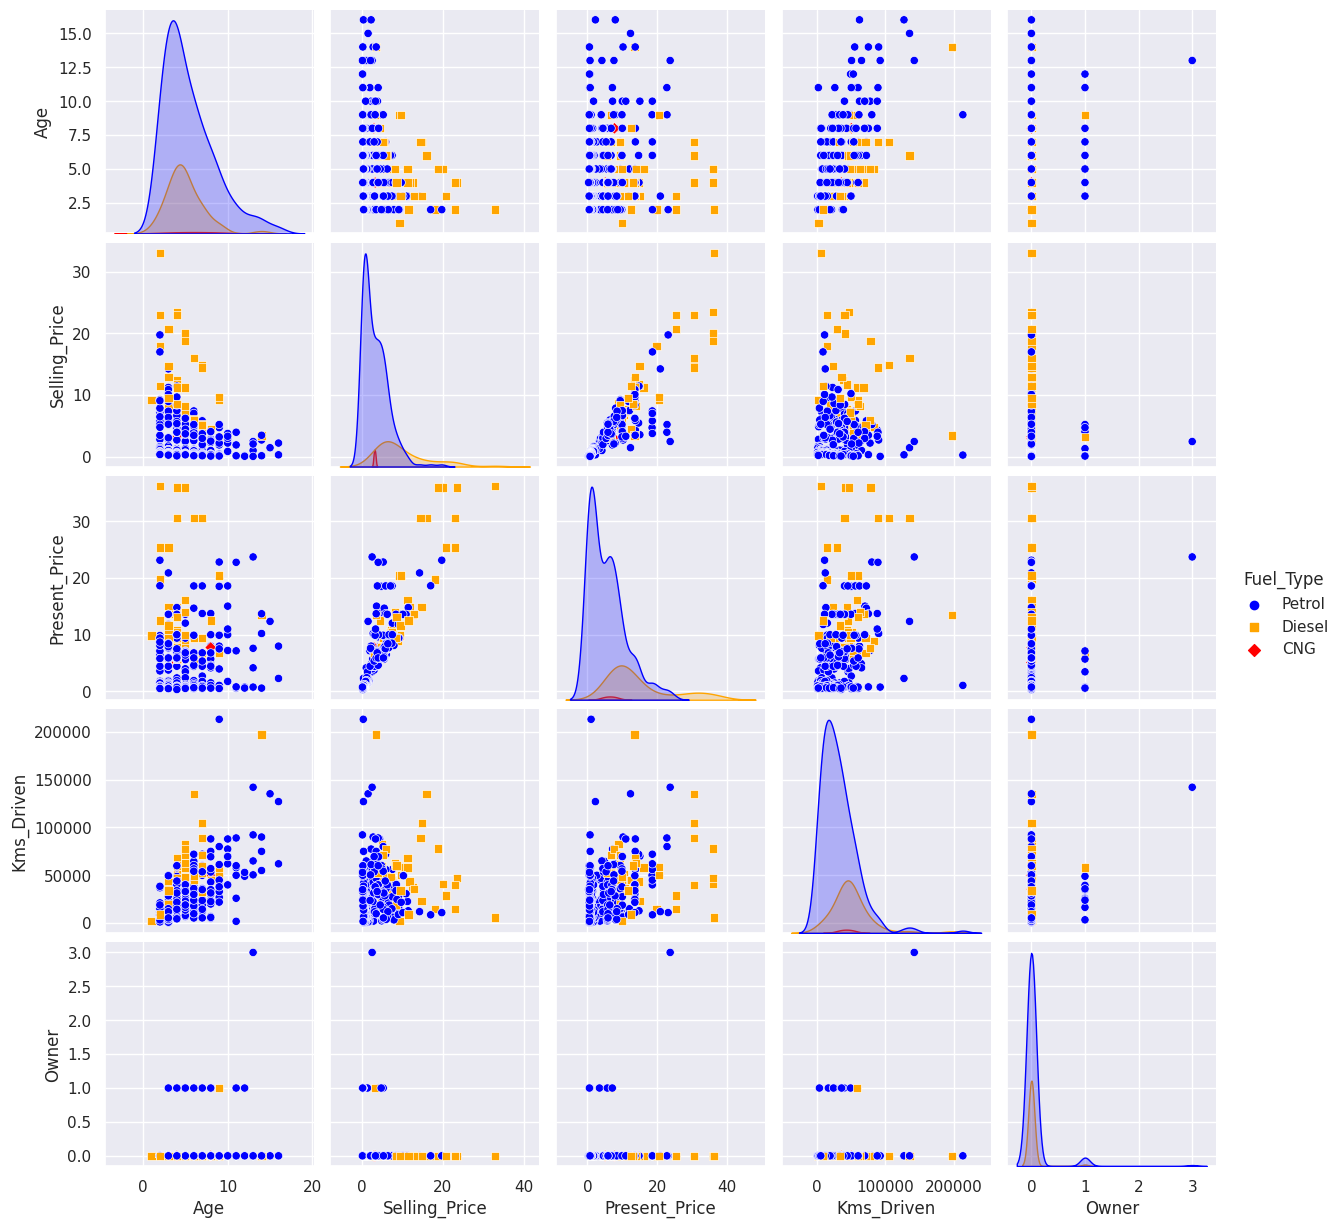

In [26]:
sns.set_style('darkgrid')
sns.pairplot(df_car ,hue='Fuel_Type' , markers=["o", "s", "D"])
plt.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.3: Categorical Variables Univariate Analysis.  </p>***

In [209]:
df_car.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

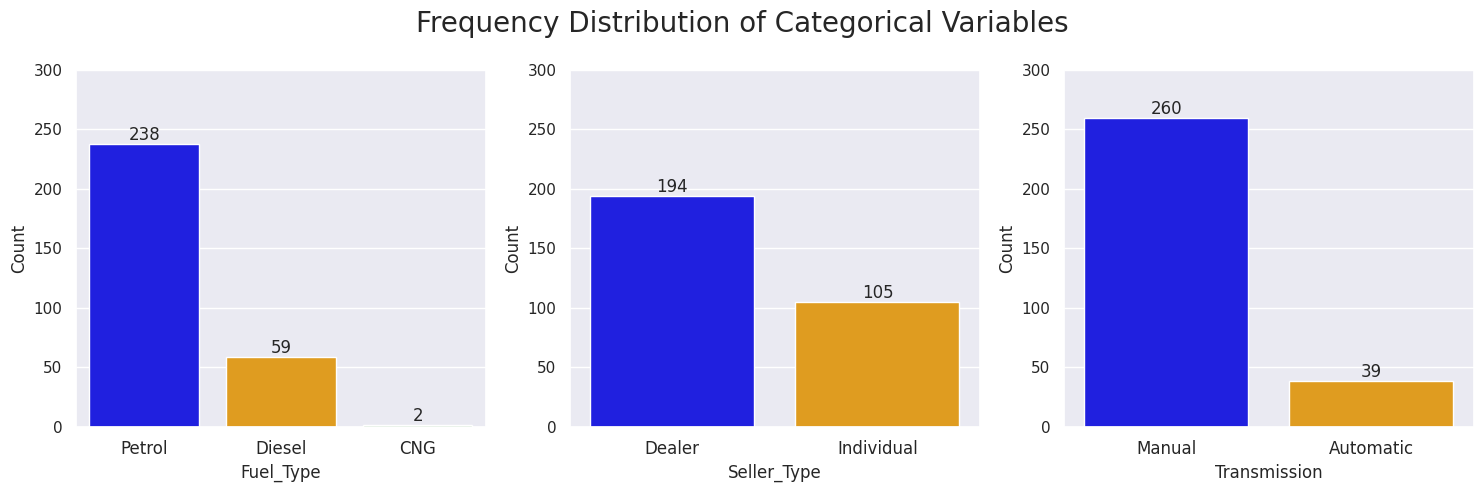

In [202]:
sns.set_style('darkgrid')
Colors  = ['blue' ,'orange' ,'green']
Catcols = df_car.select_dtypes(include = 'object').columns
Custom_palette = sns.set_palette(sns.color_palette(Colors))

fig ,ax = plt.subplots(nrows = 1 ,ncols = 3 ,figsize = (15,5) ,dpi=100)
for i,col in enumerate(Catcols):
    graph = sns.countplot(data = df_car ,x = col ,ax = ax[i])
    ax[i].set_xlabel(col ,fontsize = 12)
    ax[i].set_ylabel('Count',fontsize = 12)
    ax[i].set_ylim([0,300])
    ax[i].set_xticklabels(ax[i].get_xticklabels() ,rotation = 0 ,fontsize = 12)
    for count in graph.containers:
        graph.bar_label(count)
        
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.4: Numerical Variables Univariate Analysis.  </p>***

In [211]:
df_car.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

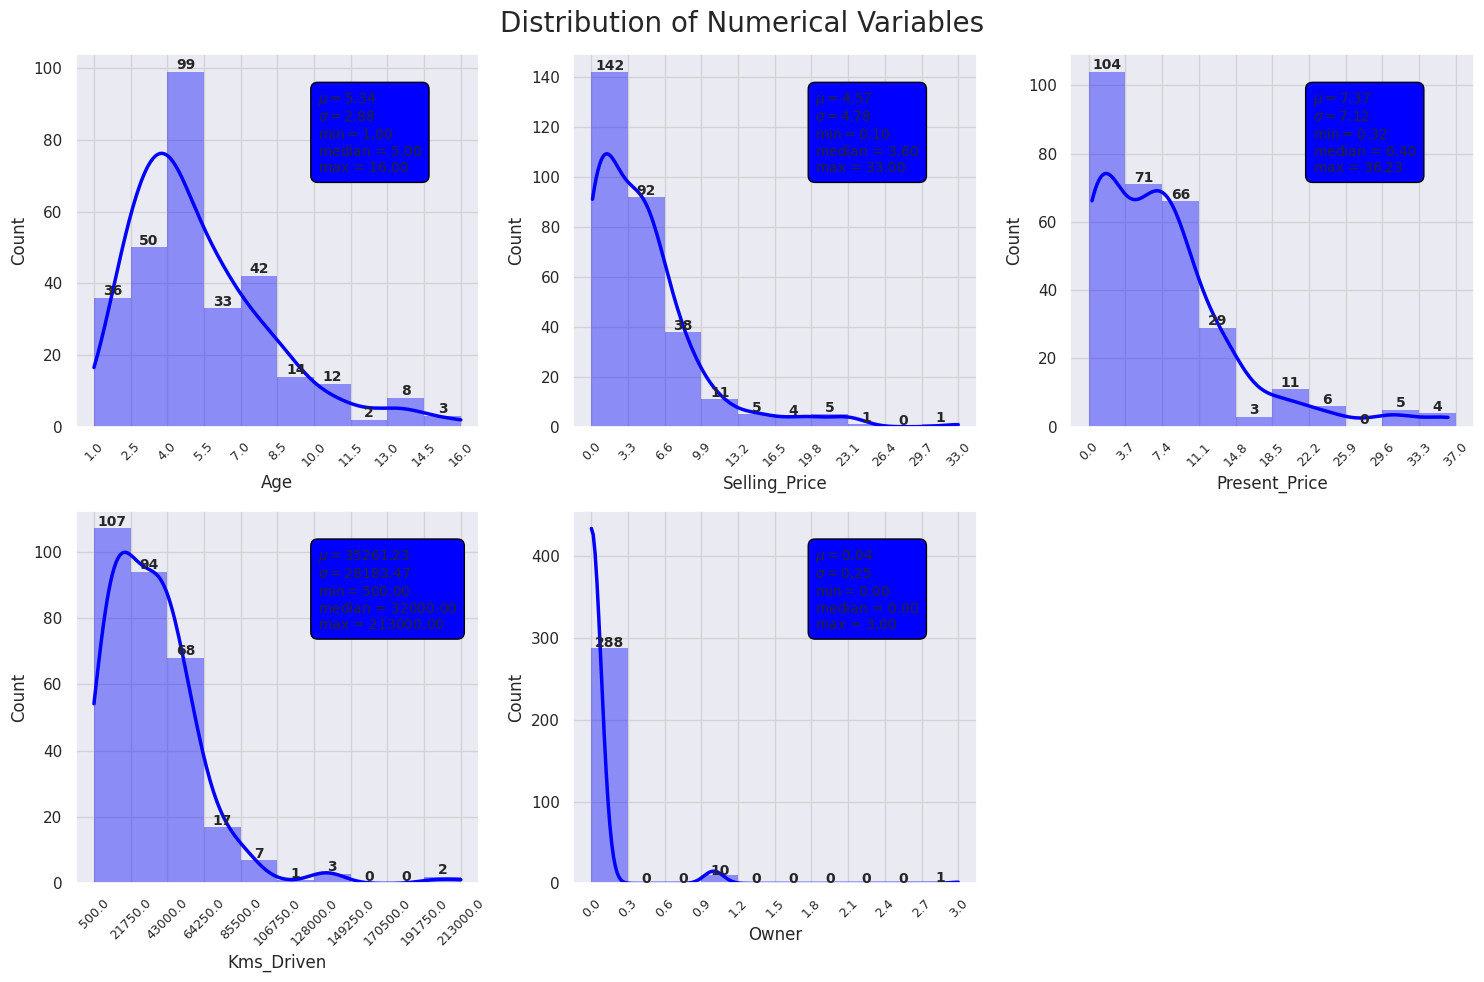

In [203]:
Color = 'blue'
Numcols = df_car.select_dtypes(include = 'number').columns

fig ,ax = plt.subplots(nrows = 2 ,ncols = 3 ,figsize = (15,10) ,dpi=100)
for i,col in enumerate(Numcols):
    x = i//3
    y = i%3
     
    hist ,bin_edges = np.histogram(df_car[col] ,range = (np.floor(df_car[col].min()) ,np.ceil(df_car[col].max())))
    '''
     hist => Array of counts for each bin
     bin_edges => Array of bin_edgs [length  is (bins+1)]
    '''
    graph = sns.histplot(data = df_car ,x = col ,bins = bin_edges ,kde = True ,edgecolor = 'none' ,
                              color = Color ,alpha = 0.4 ,line_kws = {'linestyle':'-','lw':2.5} ,ax = ax[x,y])
    
    ax[x,y].set_xlabel(col ,fontsize = 12)
    ax[x,y].set_ylabel('Count' ,fontsize = 12)
    ax[x,y].set_xticks(np.round(bin_edges,1))
    ax[x,y].set_xticklabels(ax[x,y].get_xticks(),rotation = 45 ,fontsize = 9)
    ax[x,y].grid(color='lightgray')
    
    for j,p in enumerate(graph.patches):
        ax[x,y].annotate('{}'.format(p.get_height()) ,xy = (p.get_x() + p.get_width()/2 , p.get_height()+0.75)
        ,ha = 'center' ,fontsize = 10 ,fontweight = 'bold')
        
    textstr = '\n'.join((
        r'$\mu = %.2f$'%df_car[col].mean(),
        r'$\sigma = %.2f$'%df_car[col].std(),
        r'$\mathrm{min} = %.2f$'%df_car[col].min(),
        r'$\mathrm{median}$ = %.2f'%df_car[col].median(),
        r'$\mathrm{max}$ = %.2f'%df_car[col].max()
        ))
    ax[x,y].text(0.6 ,0.9 ,textstr ,transform = ax[x,y].transAxes ,fontsize = 10 , verticalalignment = 'top',
                 bbox = dict(boxstyle = 'round' ,facecolor = Color , edgecolor = 'black' ,pad = .5))
        
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
ax[1,2].axis('off')
plt.tight_layout()
plt.show()

***As we can see,variables are right-skewed.***
- ***Right-skewness can affect statistical analyses, especially when using models that assume normally distributed data (ex. linear regression).***
- ***Should I transform the data to correct the skewness by `Box-Cox Transformation` later***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.5: Target vs. Categorical Features Bivariate Analysis.  </p>***

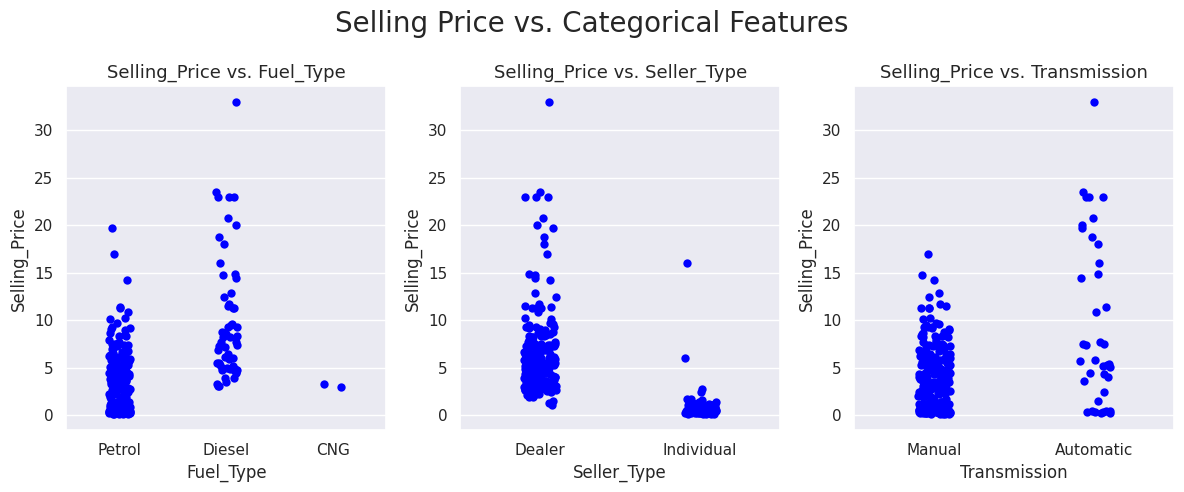

In [204]:
Color = 'blue' 
Catcols = df_car.select_dtypes(include = 'object').columns

fig ,ax = plt.subplots(nrows = 1 ,ncols = 3 ,figsize = (12,5) ,dpi=100)
for i,col in enumerate(Catcols):                                                                       #add random noise
    sns.stripplot(data = df_car ,x = col , y = df_car.Selling_Price ,ax = ax[i] ,size = 6 ,color = Color ,jitter = True)
    ax[i].set_title('{} vs. {}'.format('Selling_Price' ,col),fontsize = 13)
    ax[i].set_xlabel(col ,fontsize = 12)
    ax[i].set_ylabel('Selling_Price' ,fontsize = 12)

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

* ***Conclusion:***
  - **Automatic cars are more expensive than manual cars.**
  - **Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.**
  - **The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.**

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.6: Target vs. Numerical Features Bivariate Analysis.  </p>***

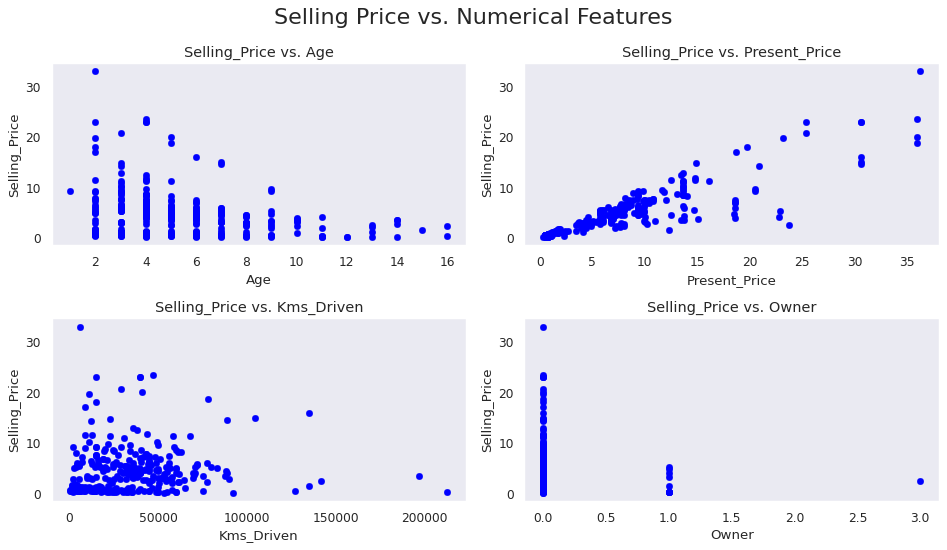

In [205]:
Color = 'blue'
traget = 'Selling_Price'
cols_drop = [target]
Numerical_cols = df_car.select_dtypes(include = 'number').columns.values #Np_array
Numcols = np.array([col for col in list(Numerical_cols) if col not in cols_drop]) # Or
'''
Numerical_cols = df_car.select_dtypes(include = 'number').columns 
Numcols = pd.Index([col for col in list(Numerical_cols) if col not in cols_drop])
#return list-like object (Index) containing the names of all the columns in df_car that are numeric.
'''

fig ,ax = plt.subplots(nrows = 2 ,ncols = 2 ,figsize = (12,7) ,dpi = 80)
for i,col in enumerate(Numcols):
    x = i//2
    y = i%2
    
    ax[x,y].scatter(x = df_car[col] ,y = df_car[target] ,color = 'blue' ,marker = 'o' ,linewidths = .25)
    ax[x,y].set_title('{} vs. {}'.format(target ,col),fontsize = 13)
    ax[x,y].set_ylabel(target ,fontsize = 12)
    ax[x,y].set_xlabel(col ,fontsize = 12)
    ax[x,y].grid()
    
plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

* ***Conclusion:***

  - **As the car ages increases, its Selling_Price decreases. So Selling_Price is `inversely proportional` to the Age of the car.**
  - **As Present_Price increases, Selling_Price increases as well. So Selling_Price is `directly proportional` to Present_Price.**
  - **As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is `inversely proportional` to Kms_Driven.**
  - **As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is `inversely proportional` to Owner.**

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 6: Categorical Variables Encoding.  </p>***

***Drop First Dummy: To avoid multicollinearity (for linear regression models), you might want to drop the first dummy variable of each categorical column***

In [206]:
Cat_cols = ['Fule_Type' ,'Seller_Type' ,'Transmission']
df_car = pd.get_dummies(df_car ,Cat_cols ,drop_first = True ,dtype = int)
df_car.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual
168,4,0.400000,0.540000,14000,0,0,1,1,1
159,8,0.450000,0.950000,24000,0,0,1,1,1
61,4,4.500000,7.700000,40588,0,0,1,0,1
195,9,0.160000,0.510000,33000,0,0,1,1,1
51,4,23.000000,30.610000,40000,0,1,0,0,0


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 7: Correlation Analysis.  </p>***

In [207]:
pd.concat([df_car.drop(labels = target ,axis = 'columns') , df_car[target]],axis = 'columns').corr()

,Age,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
Age,1.00,0.01,0.62,0.19,-0.07,0.07,0.03,0.01,-0.28
Present_Price,0.01,1.00,0.34,0.02,0.50,-0.49,-0.59,-0.45,0.88
Kms_Driven,0.62,0.34,1.00,0.13,0.26,-0.26,-0.21,-0.09,0.06
Owner,0.19,0.02,0.13,1.00,-0.05,0.06,0.13,-0.05,-0.09
Fule_Type_Diesel,-0.07,0.50,0.26,-0.05,1.00,-0.98,-0.35,-0.11,0.55
Fule_Type_Petrol,0.07,-0.49,-0.26,0.06,-0.98,1.00,0.36,0.10,-0.54
Seller_Type_Individual,0.03,-0.59,-0.21,0.13,-0.35,0.36,1.00,0.08,-0.57
Transmission_Manual,0.01,-0.45,-0.09,-0.05,-0.11,0.10,0.08,1.00,-0.41
Selling_Price,-0.28,0.88,0.06,-0.09,0.55,-0.54,-0.57,-0.41,1.00


* ***The correlation coefficient r ranges from -1 to 1:***
  - ***1: Perfect positive correlation***
  - ***-1: Perfect negative correlation***
  - ***0: No correlation***
  - ***0.5 to 1 or -0.5 to -1: Strong correlation***
  - ***0.3 to 0.5 or -0.3 to -0.5: Moderate correlation***
  - ***0 to 0.3 or 0 to -0.3: Weak correlation***

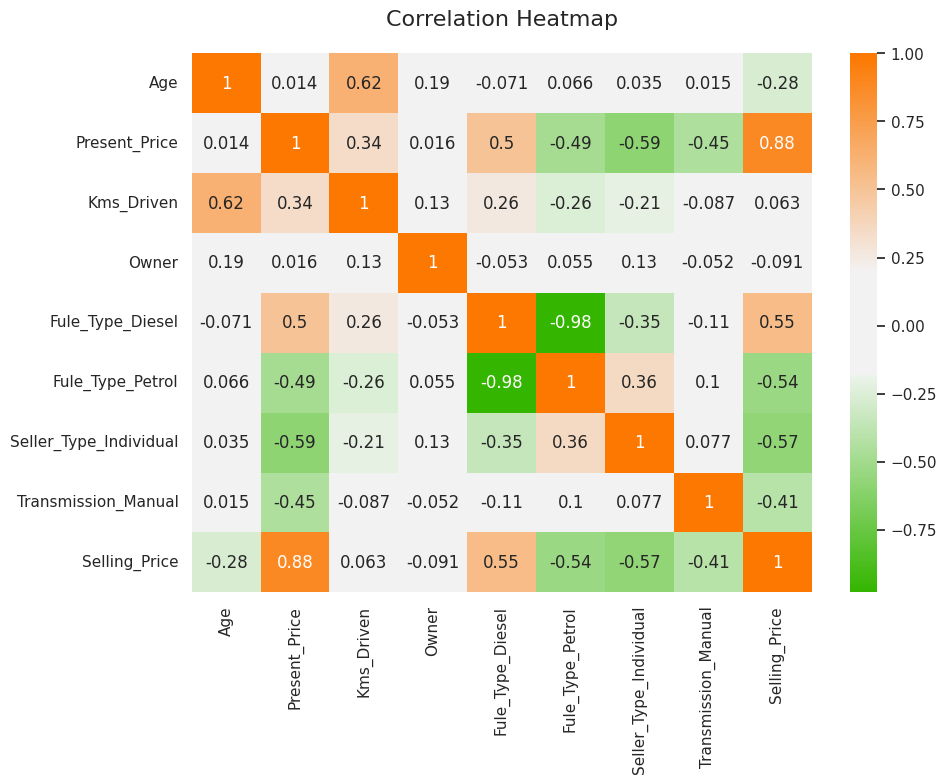

In [208]:
target = 'Selling_Price'
#Create custom cmap_palette by diverging_palette
Cmap = sns.diverging_palette(125 ,28 ,s = 100 ,l = 65 ,sep = 50 ,as_cmap = True)
fig ,ax = plt.subplots(figsize = (10,7) ,dpi = 100)
ax = sns.heatmap(pd.concat([df_car.drop(labels = target ,axis = 'columns') , df_car[target]],axis = 'columns').corr() ,annot = True ,cmap = Cmap)
# drop target column as add and arrange it into last column ,which might be useful for readability.
plt.title('Correlation Heatmap', pad=20, fontsize=16)
plt.show()

* ***Conclusion***
  - ***The target variable "Selling Price" is highly correlated with Present_Price & Seller_Type & Fuel_Type.***
  - ***Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity.***

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 8 : Rapid Model Benchmarking using LazyPredict.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Lazypredict is great because it quickly evaluates multiple machine learning models with minimal setup, allowing you to identify the best-performing algorithms without the need for extensive manual tuning or coding.***
</div>

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.1: Determine Features & Target Variables.  </p>***

In [209]:
target = 'Selling_Price' 
X_first = df_car.drop(labels = target ,axis = 'columns')
y_first = df_car[target]

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.2: Split Dataset to Training & Test Sets.  </p>***

In [210]:
X_train_f ,X_test_f ,y_train_f ,y_test_f = train_test_split(X_first ,y_first ,test_size = 0.3 ,random_state=42)
print(X_train_f.shape)
print(X_test_f.shape)
print(y_train_f.shape)
print(y_test_f.shape)

(209, 8)
(90, 8)
(209,)
(90,)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.3: Build LazyRegressor Model.  </p>***

In [211]:
%%capture
! pip install lazypredict

In [ ]:
'''
To suppress the output when installing a library in a Jupyter notebook
# %%capture   Or
# !pip install lazypredict > /dev/null 2>&1
'''

In [212]:
from lazypredict.Supervised import LazyRegressor

# Initialize and fit LazyRegressor
regressor = LazyRegressor(ignore_warnings=True)
models ,predictions= regressor.fit(X_train_f ,X_test_f ,y_train_f ,y_test_f)
# Save all models information in csv
models.to_csv("lazy_regressor_results.csv")
# Display the results
print(models)

100%|██████████| 42/42 [00:03<00:00, 11.98it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 7
[LightGBM] [Info] Start training from score 4.376220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.4: Best 5 models in terms of accuracy.  </p>***

In [213]:
# Create a dictionary with model names and their corresponding metrics
data = {
    'Model': ['GradientBoostingRegressor', 'ExtraTreesRegressor', 'XGBRegressor', 'RandomForestRegressor', 'BaggingRegressor'],
    'Adjusted R-Squared': [0.98, 0.97, 0.97, 0.96, 0.96],  # None used since value is not provided
    'R-Squared': [0.98, 0.98, 0.98, 0.96, 0.96],
    'RMSE': [0.69, 0.81, 0.84, 1.00, 1.01],
    'Time Taken': [0.15, 0.14, 0.06, 0.19, 0.03]
}
                  
# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})


,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,GradientBoostingRegressor,0.980000,0.980000,0.690000,0.150000
1,ExtraTreesRegressor,0.970000,0.980000,0.810000,0.140000
2,XGBRegressor,0.970000,0.980000,0.840000,0.060000
3,RandomForestRegressor,0.960000,0.960000,1.000000,0.190000
4,BaggingRegressor,0.960000,0.960000,1.010000,0.030000


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.5: All Models Evaluate.  </p>***

In [214]:
def model_evaluate(model ,X_train ,X_test ,y_train ,y_test ,model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test ,y_pred)
    RMSE = np.sqrt(MSE)
    R2_score = metrics.r2_score(y_test,y_pred)
    Score_test = model.score(X_test , y_test)*100
    Score_train = model.score(X_train , y_train)*100
    
    n = X_test.shape[0] # Number of samples
    p = X_test.shape[1] # Number of features
    Adjusted_r_squared = 1 - (1 - R2_score) * (n - 1) / (n - p - 1)
    
    # Optionally, print the first few predicted values alongside the actual values
    print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(5))

    return pd.DataFrame(data = [MAE ,MSE ,RMSE ,R2_score ,Score_test ,Score_train ,Adjusted_r_squared] ,
                        index = ['MAE' ,'MSE' ,'RMSE' ,'R2_score ','Score_test' ,'Score_train' ,'Adjusted_r_squared']
                        ,columns = [model_name]).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.6:  All Models Evaluate Using Cross Validate.  </p>***

In [215]:
def model_evaluate_use_Cross_validate(model ,X ,y ,Make_scale ,model_name):
    if Make_scale==False:
        pipeline = make_pipeline(model)
    else:        
        pipeline = make_pipeline(StandardScaler(), model)        

    K_Fold = KFold(n_splits = 6 ,shuffle = True ,random_state = 42)
    Scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    result = cross_validate(pipeline, X, y, cv=K_Fold, return_train_score=True, scoring=Scoring)

    Fit_time = (result['fit_time'])
    MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
    MAE_std =  (-result['test_neg_mean_absolute_error']).std()
    MSE_mean = (-result['test_neg_mean_squared_error']).mean()
    MSE_std =  (-result['test_neg_mean_squared_error']).std()
    RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
    RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
    R2_Score_mean = result['test_r2'].mean()
    R2_Score_std  = result['test_r2'].std()
    R2_train_mean = result['train_r2'].mean()
    R2_train_std  = result['train_r2'].std()

    #Array of fit times for each fold.
    print("Fit Times (seconds): {}".format(Fit_time))
    return pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean,R2_train_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std,R2_train_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score','R2_Train']).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌First we build Models that Generally Do Not Require Scaling Data (GBR ,RF ,DT ,XGB,ExtraTR,BaggingR).***
</div>

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 9: Build GradientBoostingRegressor Model.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 9.1: Train The Model.  </p>***

In [216]:
model = GradientBoostingRegressor(random_state=42)
Gbr_model = model.fit(X_train_f,y_train_f)

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 9.2: Model Evaluation.  </p>***

In [217]:
model_evaluate(Gbr_model ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'GBR Regressor')

     Actual  Predicted
281    8.99       9.08
265    8.35       8.35
164    0.45       0.58
9      7.45       7.13
77     1.50       3.03


,GBR Regressor
MAE,0.402739
MSE,0.477615
RMSE,0.691097
R2_score,0.983290
Score_test,98.329017
Score_train,99.652887
Adjusted_r_squared,0.981640


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 9.3: Model Evaluation using Cross-Validation.  </p>***

In [218]:
model_evaluate_use_Cross_validate(Gbr_model ,X_first ,y_first ,False ,'GBR Regressor')

Fit Times (seconds): [0.0682869  0.06558442 0.06585145 0.06815314 0.06537437 0.06622458]


,Mean,Std
MAE,0.505960,0.097453
MSE,0.967434,0.646947
RMSE,0.933964,0.308458
R2-Score,0.956805,0.022035
R2_Train,0.996412,0.000351


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 10: Build GradientBoostingRegressor Model Using Hyperparmeter Tunning.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Note : We will make GradientBoostingRegressor hyperparameters tunning model and get best model with best paramters from it then use it in Voting Regressor later.***
</div>


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 10.1: Train The Model.  </p>***

In [219]:
Gbr_model_tunning = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators':np.arange(100,1000,100),
    'learning_rate':[0.01,0.02,0.05,0.1,0.2],
    'max_depth':np.arange(3,10,2),
    'min_samples_split':np.arange(2,10,2),
    'min_samples_leaf':[1,2,5,7],
    'subsample':[0.7,0.8,0.9,1.0],
    'max_features':[1.0,'sqrt'],     
    'loss': ['squared_error', 'huber'] 
    # This is the Huber loss, a combination of squared error and absolute error. It is robust to outliers.
}

Gbr_search_cv = RandomizedSearchCV(estimator = Gbr_model_tunning, param_distributions = param_grid,
                                    n_iter=100, cv=6, random_state =42, n_jobs=-1) # Use all available CPU cores

# Fit the model with RandomizedSearchCV
Gbr_search_cv.fit(X_train_f ,y_train_f)
# # Get the best model from RandomizedSearchCV
Best_gbr_model = Gbr_search_cv.best_estimator_
print(Best_gbr_model)

GradientBoostingRegressor(loss='huber', max_depth=9, max_features=1.0,
                          min_samples_split=4, n_estimators=700,
                          random_state=42, subsample=0.8)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 10.2: Model Evaluation.  </p>***

In [220]:
model_evaluate(Best_gbr_model ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'GBR_Regressor_Tuning')

     Actual  Predicted
281    8.99       9.68
265    8.35       8.64
164    0.45       0.42
9      7.45       7.01
77     1.50       1.61


,GBR_Regressor_Tuning
MAE,0.441914
MSE,0.484560
RMSE,0.696104
R2_score,0.983047
Score_test,98.304717
Score_train,100.000000
Adjusted_r_squared,0.981373


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 10.3: Model Evaluation using Cross-Validation.  </p>***

In [221]:
model_evaluate_use_Cross_validate(Gbr_search_cv ,X_first ,y_first ,False ,'GBR_Regressor_Tuning') # we must send original model not best_gbr_model because cross val  build new model in it 

Fit Times (seconds): [813.73102617 814.99661684 830.27440357 829.83918762 835.20315838
 816.65366411]


,Mean,Std
MAE,0.529702,0.080369
MSE,1.041239,0.776918
RMSE,0.960358,0.344894
R2-Score,0.954355,0.025585
R2_Train,0.987728,0.010856


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 11: Build RandomForestRegressor Model Using Hyperparmeter Tunning.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 11.1: Train The Model.  </p>***

In [222]:
Rand_forst_model = RandomForestRegressor(random_state=42)

# Hyperparameters
n_estemator = list(range(500,1000,100))
max_depth = list(range(4,9,4)) 
min_sample_split = list(range(4,9,2))
min_sample_leaf = [1,2,5,7]
max_features = [1.0,'sqrt']

# Hyperparameters dict
param_grid = {
    'n_estimators': n_estemator,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split,
    'min_samples_leaf': min_sample_leaf,
    'max_features': max_features
}

Rand_forst_cv = RandomizedSearchCV(estimator = Rand_forst_model, param_distributions = param_grid,
                                    n_iter=100, cv=6, random_state =42, n_jobs=-1) # Use all available CPU cores
# Fit the model with RandomizedSearchCV
Rand_forst_cv.fit(X_train_f ,y_train_f)

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]},
                   random_state=42)

In [223]:
# Get the best model from RandomizedSearchCV
Best_rf_model = Rand_forst_cv.best_estimator_
print(Best_rf_model)

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=500,
                      random_state=42)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 11.2: Model Evaluation.  </p>***

In [224]:
model_evaluate(Best_rf_model ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'RandomForest_Tunning')

     Actual  Predicted
281    8.99       9.75
265    8.35       8.15
164    0.45       0.44
9      7.45       6.91
77     1.50       3.52


,RandomForest_Tunning
MAE,0.621049
MSE,1.152584
RMSE,1.073585
R2_score,0.959676
Score_test,95.967571
Score_train,97.211833
Adjusted_r_squared,0.955693


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 11.3: Model Evaluation using Cross-Validation.  </p>***

In [225]:
# we must send original model not Best_rf_model because cross val  build new model in it 
model_evaluate_use_Cross_validate(Rand_forst_cv ,X_first ,y_first ,False ,'RandomForest_Tunning') 

Fit Times (seconds): [612.48805332 615.02416182 614.09970593 614.04556227 612.63265324
 614.66589355]


,Mean,Std
MAE,0.693894,0.189228
MSE,2.235860,1.323522
RMSE,1.417118,0.477113
R2-Score,0.908489,0.040761
R2_Train,0.949910,0.050802


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 12: Build VotingRegressor Model Using 3 Best Models.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Note : First we use GBR with hypertuning parameters to find best model parameters and then use it in Voting Regressor with ExtraTrees & XGB.</div>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 12.1: Train The Model.  </p>***

In [226]:
# 1. Define GradientBoostingRegressor Model
GBR = Best_gbr_model

# 2. Define ExtraTreesRegressor Model
EXTATREES  = ExtraTreesRegressor(random_state = 42)

# 3. Define XGB Regressor Model
XGB = XGBRegressor(learning_rate=0.5, n_estimators=200, max_depth =10)

# Buile VotingRegressorModel
VotingRegressorModel = VotingRegressor([('GBR', GBR), ('EXTATREES', EXTATREES), ('XGB',XGB)])
VotingRegressorModel.fit(X_train_f,y_train_f)

VotingRegressor(estimators=[('GBR',
                             GradientBoostingRegressor(loss='huber',
                                                       max_depth=9,
                                                       max_features=1.0,
                                                       min_samples_split=4,
                                                       n_estimators=700,
                                                       random_state=42,
                                                       subsample=0.8)),
                            ('EXTATREES', ExtraTreesRegressor(random_state=42)),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=N...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.5, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))])

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 12.2: Model Evaluation.  </p>***

In [227]:
model_evaluate(VotingRegressorModel ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'VotingRegressor')

     Actual  Predicted
281    8.99       9.42
265    8.35       8.75
164    0.45       0.43
9      7.45       7.23
77     1.50       2.66


,VotingRegressor
MAE,0.406472
MSE,0.416983
RMSE,0.645742
R2_score,0.985411
Score_test,98.541142
Score_train,99.999999
Adjusted_r_squared,0.983971


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 12.3: Model Evaluation using Cross-Validation.  </p>***

In [228]:
# we must send original model because cross val  build new model in it 
model_evaluate_use_Cross_validate(VotingRegressorModel ,X_first ,y_first ,False ,'VotingRegressor')

Fit Times (seconds): [9.39985704 9.50509119 9.68425083 9.31805682 9.61871672 8.75732756]


,Mean,Std
MAE,0.512894,0.089175
MSE,0.964096,0.720172
RMSE,0.930718,0.312826
R2-Score,0.958084,0.022636
R2_Train,1.000000,0.000000


In [229]:
print("score_test=", VotingRegressorModel.score(X_test_f , y_test_f)*100)
print("score_train=", VotingRegressorModel.score(X_train_f , y_train_f)*100)

score_test= 98.54114243230978
score_train= 99.99999859874819


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 13: Build StackingRegressor Model Using 4 Best Models.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Note : We use Best GBR with hypertuning parameters in Stacking Regressor with RandomForestRegressor & ExtraTrees & Bagging Regressor & Final estimator Ridge.</div>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 13.1: Train The Model.  </p>***

In [230]:
# 1. Define GradientBoostingRegressor
GBR = Best_gbr_model

# 2. Define BAGGING Regressor
BAGGINGREG = BaggingRegressor(random_state = 42)

# 3. Define EXTRATREESRegressor
EXTATREESREG  = ExtraTreesRegressor(random_state = 42)

# 4. Define RandomForestRegressor
RANDFORESTREG = RandomForestRegressor(random_state=42)

# Define the stacking model
estimators = [
    ('GBR',GBR),
    ('BAGGINGREG',BAGGINGREG),
    ('EXTATREESREG',EXTATREESREG),
    ('RANDFORESTREG',RANDFORESTREG)
  ]
# Use Ridge as the final estimator (meta-model)
Stacking_regressor = StackingRegressor(
                 estimators = estimators,
                 final_estimator = Ridge(),
                 cv = 10,
                 n_jobs = -1
 )

Stacking_regressor.fit(X_train_f,y_train_f)

StackingRegressor(cv=10,
                  estimators=[('GBR',
                               GradientBoostingRegressor(loss='huber',
                                                         max_depth=9,
                                                         max_features=1.0,
                                                         min_samples_split=4,
                                                         n_estimators=700,
                                                         random_state=42,
                                                         subsample=0.8)),
                              ('BAGGINGREG', BaggingRegressor(random_state=42)),
                              ('EXTATREESREG',
                               ExtraTreesRegressor(random_state=42)),
                              ('RANDFORESTREG',
                               RandomForestRegressor(random_state=42))],
                  final_estimator=Ridge(), n_jobs=-1)

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 13.2: Model Evaluation.  </p>***

In [231]:
model_evaluate(Stacking_regressor ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'StackingRegressor')

     Actual  Predicted
281    8.99       9.86
265    8.35       9.24
164    0.45       0.08
9      7.45       7.09
77     1.50       1.85


,StackingRegressor
MAE,0.632653
MSE,0.752347
RMSE,0.867379
R2_score,0.973678
Score_test,97.367839
Score_train,98.991545
Adjusted_r_squared,0.971079


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 13.3: Model Evaluation using Cross-Validation.  </p>***

In [232]:
# we must send original model because cross val  build new model in it 
model_evaluate_use_Cross_validate(Stacking_regressor ,X_first ,y_first ,False ,'StackingRegressor')

Fit Times (seconds): [ 96.47042394  94.98992133 100.04061341  97.49856853  96.07899618
  93.92617631]


,Mean,Std
MAE,0.564508,0.094893
MSE,1.007066,0.692975
RMSE,0.953796,0.311993
R2-Score,0.955474,0.023537
R2_Train,0.995877,0.002078


***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌 Second we build Models that Generally Require Scaling Data (LR ,KNN ,Polynomil Regression).***
</div>

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 14: Build LinearRegression Model.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 14.1: Determine Features & Target Variables.  </p>***

In [233]:
target = 'Selling_Price' 
X_second = df_car.drop(labels = target ,axis = 'columns')
y_second = df_car[target]

In [234]:
print(X_second.shape)
print(y_second.shape)

(299, 8)
(299,)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 14.2: Split Dataset to Training & Test Sets.  </p>***

In [235]:
X_train ,X_test ,y_train ,y_test = train_test_split(X_second ,y_second ,test_size = 0.3 ,random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 8)
(90, 8)
(209,)
(90,)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 14.3: Scale Data Using StandardScaler.  </p>***

<div style="background-color: lightyellow;color: black; padding: 10px; border-radius: 5px;">
<span style="color: red; font-weight: bold;">⚠️Warning:</span> <span style="color: black; font-weight: bold;">It is very important that StandardScaler transformation should only be learnt from the training set, otherwise it will lead to data leakage.</span>
</div>

In [236]:
Scaler = StandardScaler()
Scaler.fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 14.4: Train The Model.  </p>***

In [237]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled ,y_train)

LinearRegression()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 14.5: Show Model Component.  </p>***

In [238]:
Model_Component = pd.DataFrame(data = np.append(linear_reg.intercept_ ,linear_reg.coef_) ,
                                   index = ['Intercept']+[col+" Cof_" for col in X_second.columns] ,
                                                                                     columns = ['Value'])
Model_Component.sort_values(by = 'Value' ,ascending = False).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Value
Intercept,4.302488
Present_Price Cof_,3.492729
Fule_Type_Diesel Cof_,0.850217
Fule_Type_Petrol Cof_,0.207319
Transmission_Manual Cof_,0.027375
Owner Cof_,-0.232722
Seller_Type_Individual Cof_,-0.377334
Kms_Driven Cof_,-0.589672
Age Cof_,-0.936339


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 14.6: Model Evaluation.  </p>***

In [239]:
model_evaluate(linear_reg ,X_train_scaled ,X_test_scaled ,y_train ,y_test ,'Linear Reg')

     Actual  Predicted
206    7.90       6.51
188    0.20      -2.95
12     7.50       6.51
219    4.50       3.93
237    2.00       2.65


,Linear Reg
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2_score,0.887245
Score_test,88.724525
Score_train,87.936938
Adjusted_r_squared,0.876109


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 14.7: Model Evaluation using Cross-Validation.  </p>***

In [240]:
Model = LinearRegression()
model_evaluate_use_Cross_validate(Model ,X_second ,y_second ,True ,'Linear Reg')

Fit Times (seconds): [0.00895357 0.00591993 0.00512433 0.00527024 0.00503707 0.00508404]


,Mean,Std
MAE,1.109669,0.149106
MSE,2.833408,0.807265
RMSE,1.666163,0.239396
R2-Score,0.873810,0.015821
R2_Train,0.890904,0.003614


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 15: Assumptions For Linear Models.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 15.1: Linearity.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌To detect nonlinearity, we can check:  
Plots of actual vs. predicted values : The desired outcome is that points are symmetrically distributed around a diagona line.  
Plots of residuals vs. predicted values : The desired outcome is that points are symmetrically distributed aroun a horizontal line.  
In both cases we should have an almost constant variancence.</div>***

In [241]:
def residuals(model ,X_test ,y_test):
    '''
    Creates predictions on the features with the model and calculates residuals.
    '''
    y_pred = model.predict(X_test)
    df_residuals = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
    df_residuals['Residuals'] = np.abs(df_residuals['Actual']) - np.abs(df_residuals['Predicted'])
    return df_residuals

In [242]:
def Check_linear_assumption(model ,X_test ,y_test):
    df_residuals = residuals(model ,X_test ,y_test)
    
    fig ,ax = plt.subplots(nrows = 1 ,ncols = 2 ,figsize = (15,5) ,dpi = 100)
    sns.regplot(x = 'Predicted' ,y = 'Actual' ,data =df_residuals ,scatter_kws = {'color':'blue','s' :40} ,
                                                  line_kws = {'color':'red','ls':'--' ,'lw':2.5} ,lowess = True ,ax = ax[0])
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12) 
    
    sns.regplot(x = 'Predicted' ,y = 'Residuals' ,data =df_residuals ,scatter_kws = {'color':'blue','s' :40} ,
                                                  line_kws = {'color':'red','ls':'--' ,'lw':2.5} ,lowess = True ,ax = ax[1])
    ax[1].set_title('Residual vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residual', fontsize=12) 
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

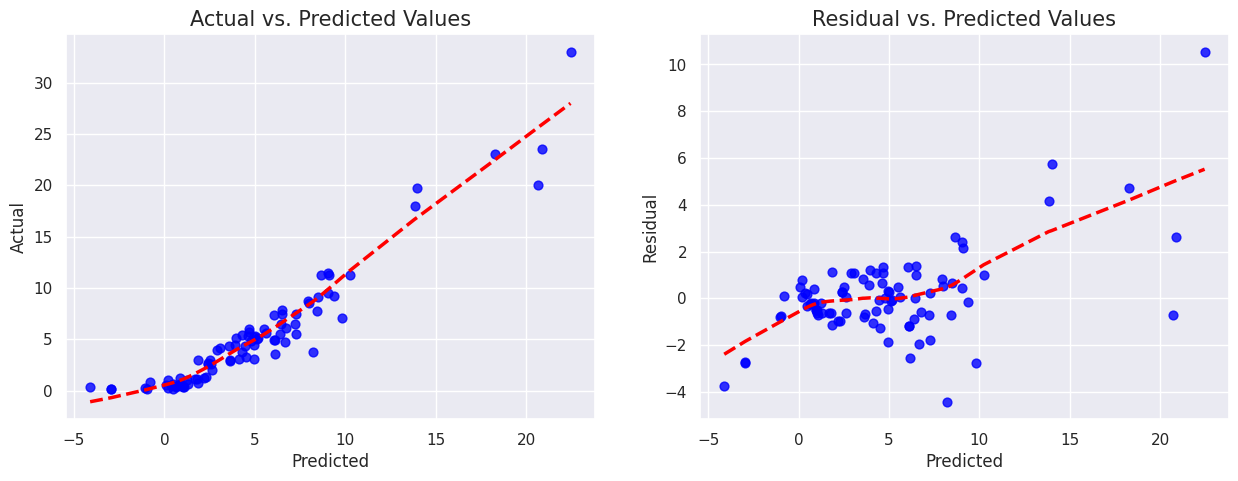

In [156]:
Check_linear_assumption(linear_reg ,X_test_scaled ,y_test)

- ***Conclusion:***
  - ***The inspection of the plots shows that the linearity assumption is not satisfied.*** 

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 15.2: Normality.  </p>***



***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">📌To investigate this assumption we can check:    
Anderson-Darling test.  
Check residuals histogram.  
Quantile-Quantile probability plot -> plotting the residuals vs. the order of statistic</div>***



In [243]:
def Check_normality_assumption(model ,X_test ,y_test ,alpha_value=0.05):
    # Get residuals 
    df_residuals = residuals(model ,X_test ,y_test)
    
    # Anderson-Darling test
    ad_statistic, p_value = normal_ad(df_residuals['Residuals'])
    print(f'Anderson-Darling Test Statistic: ', np.round(ad_statistic,6))
    print(f'p-value: ',"{:.6e}".format(p_value))

    # Interpretation
    print(f'Check normality assumption using Anderson-Darling test Way 1')
    alpha_value = 0.05
    if p_value < alpha_value:
        print(f"The data does not come from a normal distribution. Assumption not satisfied")
    else:
        print(f"The data comes from a normal distribution. Assumption satisfied")
        
    # Way 2
    result = stats.anderson(df_residuals['Residuals'] ,dist = 'norm')
    # Anderson output result like
    '''
       AndersonResult(statistic=0.4252905907819695, 
       critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), 
       significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), 
       fit_result=  params: FitParams(loc=-0.0561952614020469, scale=0.9974806167774968)
       success: True
       message: '`anderson` successfully fit the distribution to the data.')
    '''
    # Interpretation
    count = 0
    for i in range(len(result.critical_values)):
        SL, CV = result.significance_level[i], result.critical_values[i]
        if result.statistic < CV:
            count+=1
                 
    print(f'Check normality assumption using Anderson-Darling test Way 2')
    if count==len(result.critical_values):
         print(f"Data seems to come from a normal distribution. Assumption satisfied")
    else:
         print(f"Data does not seem to come from a normal distribution.Assumption not satisfied")
    
        
     # Residuals Histogram
    fig , ax = plt.subplots(nrows = 1 ,ncols = 2 ,figsize = (15,6) ,dpi=150)
    graph = sns.histplot(data = df_residuals , x = 'Residuals' , kde = True ,ax = ax[0] , bins=15,
                            color = 'blue' , edgecolor = 'none' ,alpha = 0.4 , line_kws = {'ls':'--','lw' : 2.5})
    ax[0].set_title('Distribution of Residuals',fontsize = 15)
    ax[0].set_xlabel('Residuals' ,fontsize = 12)
    ax[0].set_ylabel('Count' ,fontsize = 12)
    
    for j ,p in enumerate(graph.patches):
        ax[0].annotate('{}'.format(p.get_height()) ,(p.get_x() + p.get_width()/2 ,p.get_height()+.75) ,
          ha='center' ,fontsize=10 ,fontweight='bold')
    textstr = '\n'.join((
       r'$\mu = %.2f$' %df_residuals['Residuals'].mean(),
       r'$\sigma =%.2f$' %df_residuals['Residuals'].std()
    ))
    ax[0].text(0.8,0.9,textstr ,transform = ax[0].transAxes ,fontsize = 15 ,verticalalignment ='top'
               ,bbox = dict(boxstyle = 'round',facecolor = 'lightblue' ,edgecolor = 'black',pad = 0.5))
    '''
        If you need to Calculate theoretical quantiles from a standard normal distribution
        Step 1: Get residuals and Sort the residuals
        residuals_sorted = np.sort(residuals1['Residuals'])
        Step 2: These will be used to check if residuals are normally distributed
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals_sorted)))
        then you can use plt.scatter(theoretical_quantiles, residuals_sorted, color='blue', label="Residuals")
        Adding a line y=x for comparisonplt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label="Normal Distribution")
    '''
    # Or
    # QQ plot(Quantile-Quantile plot) 
    stats.probplot(df_residuals['Residuals'] ,dist = 'norm' ,plot = ax[1])
    ax[1].set_title('Residuals Q-Q Plot', fontsize = 15)
    ax[1].set_xlabel('Theoretical Quantiles' ,fontsize = 12)
    ax[1].set_ylabel('Values' ,fontsize = 12)
    ax[1].get_lines()[0].set_markerfacecolor('blue')
    ax[1].get_lines()[1].set_color('orange')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'],loc='upper left')     
    plt.grid(True) 
    plt.show()

Anderson-Darling Test Statistic:  3.987043
p-value:  5.271453e-10
Check normality assumption using Anderson-Darling test Way 1
The data does not come from a normal distribution. Assumption not satisfied
Check normality assumption using Anderson-Darling test Way 2
Data does not seem to come from a normal distribution.Assumption not satisfied


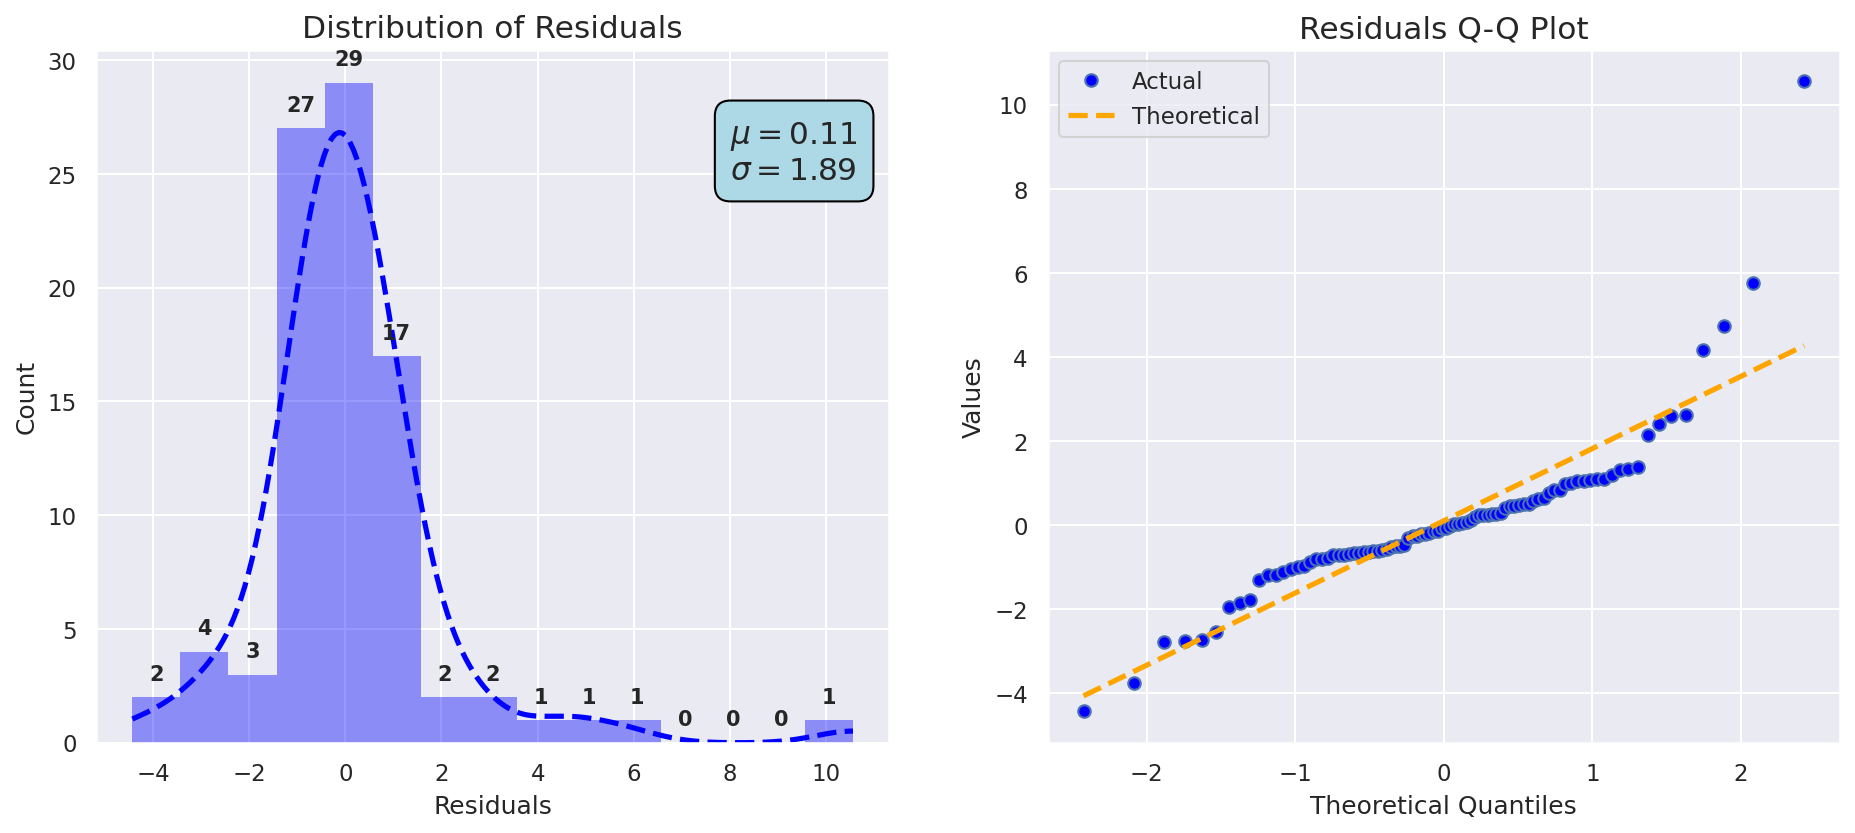

In [244]:
Check_normality_assumption(linear_reg ,X_test_scaled ,y_test ,alpha_value=0.05)

- ***Conclusion:***
  - ***The inspection of the plots shows that the Normality assumption is not satisfied.*** 

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 15.3: No Perfect Multicollinearity.  </p>***

***1. "No Perfect Multicollinearity" means that none of the independent variables in the model is an exact linear combination of the others. This is a basic assumption in most linear regression models to ensure that the model can be properly estimated.***

* **Multicollinearity can be detected using several methods, including:**
  - `Condition number:` A high condition number may indicate multicollinearity.
  - `Variance Inflation Factor (VIF):` A high VIF indicates high multicollinearity.
  - `Correlation matrix:` Checking the correlation between independent variables to identify highly correlated pairs(Step 7).

***2. Is it necessary first make scaler to data before find VIF or Condition Number when we dedicte NO perfect Multicollinearity?***
* No, it is not necessary to scale the data before calculating the Variance Inflation but recommended when calculate condition number.
* For VIF is `scale-independent `, meaning that scaling the data (such as through standardization or normalization) will not affect    the VIF values.
    * The Variance Inflation Factor (VIF) is based on the correlation between variables, and `correlation is also scale-independent`.
* For the Condition Number, scaling may be recommended to avoid numerical instability, especially when the variables have different units or magnitudes.
    * The Condition Number is based on eigenvalues from matrix _`which are scale-dependent`_ decomposition, and `it can be sensitive to scaling`, as the magnitudes of variables affect the matrix operations.

***3. How do we interpret VIF values?***
 - ***For VIF:***
   - VIF = 1: No correlation between the predictor and other variables.
   - 1 < VIF < 5: Moderate multicollinearity.
   - VIF > 5: High multicollinearity that might require investigation.
   - VIF > 10: A very high level of multicollinearity, indicating that the variable is highly collinear with others, and it could affect the regression analysis.
   
- ***For Condition Number:***
  - Condition Number < 10: NO multicollinearity.
  - Condition Number between 10 and 30 : Moderate multicollinearity.
  - Condition Number > 30: High multicollinearity, indicating potential problems with the model.

- ***Calculate Variance inflation factor (VIF)***
  - First we not need make Scaler For data:
  - The formula for VIF is:
<p align="center">
\[
VIF(X_i) = \frac{1}{1 - R_i^2}
\]
</p>

In [245]:
def Calculate_VIF(data_frame):
    vif_data = pd.DataFrame()
    vif_data['Features'] = data_frame.columns                                        # num cols
    vif_data['VIF'] = [variance_inflation_factor(data_frame.values,i) for i in range(data_frame.shape[1])]
    return vif_data

- ***Calculate Conditional Number:***
  - First we must make Scaler For data.
  - The formula for conditional number.
  <p cnter>
  \[
\kappa(X) = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}
\]
    </p>

In [246]:
#The condition number is calculated for the entire matrix by taking the ratio of the largest singular value to the smallest singular value (from Singular Value Decomposition).
def Calculate_Condition_number(X):
    df_scaled = X.copy()
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(df_scaled),columns = df_scaled.columns) 
    condtion_number = np.linalg.cond(X_scaled)
    return condtion_number

In [247]:
def Check_Multicollinearity_assumption(X):
   
    Vif_without_scaling = Calculate_VIF(X)
    possible_multicollinearity = sum([1 for vif_value in Vif_without_scaling['VIF'] if vif_value > 10])
    definite_multicollinearity = sum([1 for vif_value in Vif_without_scaling['VIF'] if vif_value > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
             print(f'NO multicollinearity.Assumption satisfied.\n')
        else:
            print(f'Moderate multicollinearity.Assumption possibly satisfied.\n')
    else:
         print(f'High multicollinearity.Assumption not satisfied.\n')
    
    #Way 2
    Cond_num = Calculate_Condition_number(X)
    print(f"Condition Number value : ",np.round(Cond_num ,3))
    if Cond_num < 10:
        print(f'NO multicollinearity. Assumption satisfied.\n')
    elif Cond_num >= 10 and Cond_num <=30:
        print(f'Moderate multicollinearity. Assumption possibly satisfied.\n')
    else:
         print(f'High multicollinearity. Assumption not satisfied.\n')
            
    return  (Vif_without_scaling.round(2)).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

In [248]:
Check_Multicollinearity_assumption(X_second)

1 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Moderate multicollinearity.Assumption possibly satisfied.

Condition Number value :  11.903
Moderate multicollinearity. Assumption possibly satisfied.



,Features,VIF
0,Age,8.150000
1,Present_Price,5.140000
2,Kms_Driven,5.340000
3,Owner,1.100000
4,Fule_Type_Diesel,6.110000
5,Fule_Type_Petrol,16.860000
6,Seller_Type_Individual,2.610000
7,Transmission_Manual,9.590000


***There is possible multicollinearity for Fuel_Type_Petrol.***
* **To avoid this possible multicollinearity**
  - **We can delete Fuel_Type_Petrol.**
  - **Using PCA -> Reducing features to a smaller set of uncorrelated components.**

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 15.4: No Autocorrelation of Residuals.  </p>***

**1. No Autocorrelation of Residuals**
  - Autocorrelation of residuals refers to the correlation of residual errors with each other over time or observations. In a well-specified model, the residuals should be independent of each other. Autocorrelation implies that the residuals are dependent, which violates the assumption of independence in linear regression.

**2. How can we detect autocorrelation of residuals?**
* A common method to detect autocorrelation is the **Durbin-Watson** (DW) test. This test returns a statistic between `0 and 4`:
  - A value near 2 suggests no autocorrelation.
  - A value near 0 suggests positive autocorrelation.
  - A value near 4 suggests negative autocorrelation.

In [249]:
def Cheack_autocorrelation_assumption(model ,X_test ,y_test):
     
    df_residuals = residuals(model ,X_test ,y_test)
    
    Durbin_watson = durbin_watson(df_residuals['Residuals'])
    
    print(f'Durbin weston test value = {np.round(Durbin_watson,5)}')
    
    if Durbin_watson < 1.5:
        print(f'Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif Durbin_watson > 2:
         print(f'Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print(f'No Autocorrelation. Assumption satisfied.', '\n')

In [250]:
Cheack_autocorrelation_assumption(linear_reg ,X_test_scaled ,y_test)

Durbin weston test value = 1.82272
No Autocorrelation. Assumption satisfied. 



- ***Conclusion:***
  - ***The Durbin weston test value shows that no Autocorrelation assumption is satisfied.*** 

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 15.5: Homoscedasticity.  </p>***

**1. What is the assumption of homoscedasticity in the context of regression analysis?**

   - The assumption of homoscedasticity in regression analysis means that the variance of the residuals (errors) is constant across all levels of the independent variable(s). This implies that no matter what value the independent variable takes, the spread of the errors remains the same.
   
**2. How can you check for homoscedasticity in your data?**
 * Visual Inspection:
   - Residuals vs. Fitted Values Plot (predicted values), as we show on linearity plot(graph 2).
 * Statistical Tests:
   - Breusch-Pagan Test or White tests
 * Scale-Location Plot:
   - Also known as a Spread-Location plot, this shows the square root of standardized residuals versus the fitted values. Ideally, it should show a horizontal line with equally spread points.
 * Influential Data: 
   - Check leverage vs. residuals plot to detect outliers that could be influencing the variance.

**1. How do you interpret the Breusch-Pagan test?**
- Null Hypothesis : Homoscedasticity (constant variance).
- Alternative Hypothesis : Heteroscedasticity (non-constant variance).
   - If the p-value is less than 0.05, you reject the null hypothesis, which means there is evidence of heteroscedasticity.
   - If the p-value is greater than 0.05, you fail to reject the null hypothesis, suggesting homoscedasticity.

In [251]:
# Way 2 I will use Breusch-Pagan Test
X_test_without_const = X_test
X_test_without_const.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual
206,2,8.100000,3435,0,0,1,0,1
188,14,0.570000,55000,0,0,1,1,1


In [252]:
def Cheack_Breusch_Pagan_Test(model ,X_test ,y_test):
    #optain residuals
    df_residuals = residuals(model ,X_test ,y_test) 

    # Add constant term to X for ordinary least squares (OLS) regression in statsmodels
    X_test_with_constant = sm.add_constant(X_test_without_const)

    # Perform the Breusch-Pagan test
    Test_results = het_breuschpagan(df_residuals['Residuals'], X_test_with_constant)

    # The Breusch-Pagan test returns several values; we'll focus on the p-value
    bp_test_stat, bp_p_value, f_test_stat, f_p_value = Test_results

    # bp_p_value
    print(f'Breusch-Pagan test p-value: ',"{:.6e}".format(bp_p_value))

    # Interpretation
    if bp_p_value < 0.05:
        print(f"Heteroscedasticity detected (variance is not constant).")
    else:
        print(f"Homoscedasticity detected (constant variance).")
    
    return X_test_with_constant

In [253]:
def Cheack_homoscedasticity_assumption(model ,X_test ,y_test):

    df_results = residuals(model ,X_test ,y_test)
    
    print('The orange line should be flat.\n')
    fig = plt.figure(figsize=(8,6), dpi=70)                   # make none linear line
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,   # drow line with data If true
                               color='blue', line_kws={'color':'orange','ls':'--','lw':2.5},fit_reg = True)
    """plt.scatter(x='Predicted', y='Residuals', data=df_results)"""
    plt.axhline(y=0, color='red', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)    
    plt.show()

    # Call Function that calculate Breusch-Pagan Test 
    print('\n')
    X_test_with_constant = Cheack_Breusch_Pagan_Test(linear_reg ,X_test_scaled ,y_test)
    return X_test_with_constant.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

The orange line should be flat.



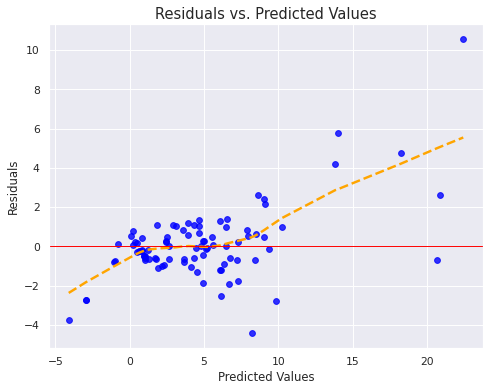



Breusch-Pagan test p-value:  2.958321e-05
Heteroscedasticity detected (variance is not constant).


,const,Age,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual
206,1.000000,2,8.100000,3435,0,0,1,0,1
188,1.000000,14,0.570000,55000,0,0,1,1,1


In [254]:
Cheack_homoscedasticity_assumption(linear_reg ,X_test_scaled ,y_test) 

**After appling `the Breusch pagan test` also assumption of homoscedasticity is not satisfied.**
* Potential solutions
  - Outlier removal
  - Appllying log transformation of independent variables
  - Applying polynomial regression

***To solve the problems that appeared in the model and the inability to achieve the conditions and assumptions, you will perform a set   of steps to solve each specific assumption and check its existence again.***
   * To satisfy the multicollinearity assumption, we `remove the Fuel_Type_Petrol feature`.
   * Then, according to the pattern in the plot of the residuals vs. predicted values, we will use `box-cox transformation` on the entire dataset.
   * By applying `polynomial regression`, we will try to `improve the satisfaction of homoscedasticity and normality of residuals`.
   * Finally, we will use `regularization` to reduce the probability of the model to be `overfit`.

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 16: APPLYING BOX COX TRANSFORMATION.  </p>***

- The Box-Cox transformation is a power transformation used to stabilize variance and make the data more normally distributed.
- Note : Box cox is flexible and should be uesed when you are unsure about exact from transformation needed. it's used when we need flexibility and the ability to transform data for better model performance, Box-Cox is more suitable. It allows different levels of transformation.
- **Equation:**
<p align="center">\[
y(\lambda) = 
\begin{cases} 
\frac{(y \lambda) - 1}{\lambda} & \text{if } \lambda \ne 0, \\
\log(y) & \text{if } \lambda = 0.
\end{cases}
\]
</p>

1. Handling non-positive values:
    - Ensure that all values in `X_train` and `y_train` are positive before applying `the Box-Cox transformation` . 
`Adding +1 is a good workaround`.
2. Handling edge cases:
   - Some columns may `not require Box-Cox transformation`, especially if their data is already normally distributed. You can check for this using `skewness tests` before applying Box-Cox.
3. Data leakage prevention:
   - Make sure that the Box-Cox transformation and lambda fitting are performed only on `training data` and `the same lambda is applied to the test data` when making predictions.

- ***First step drop Fuel_Type_Petrol to satisfy multicollinearity assumption.***

In [108]:
df_car.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fule_type_Diesel', 'Fule_type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [256]:
# del df_car['Fule_Type_Petrol']
removed_column = df_car.pop('Fule_Type_Petrol')

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 16.1:  Results Visualization.  </p>***

In [284]:
def Comparison_predicted_vs_original_data(model ,X_test ,y_test):
    y_test_pred = model.predict(X_test)
    df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

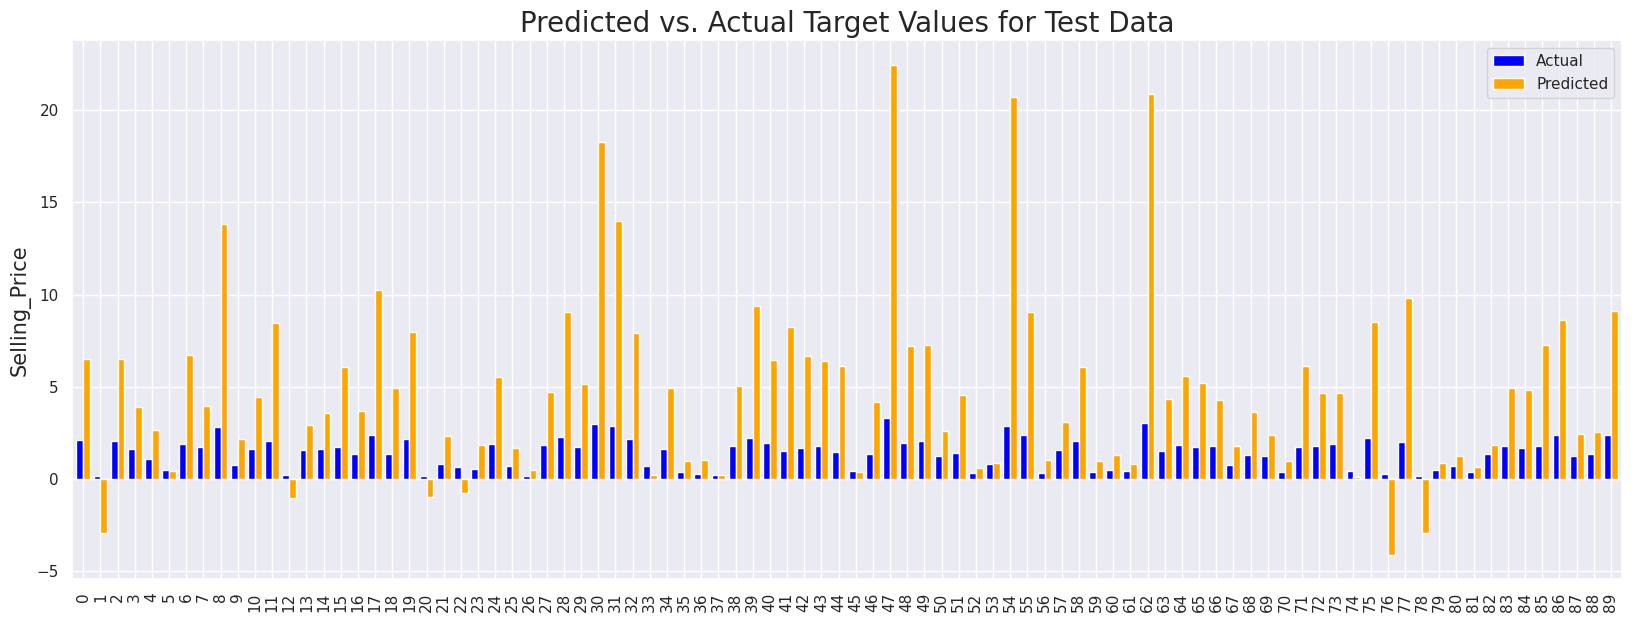

In [285]:
Comparison_predicted_vs_original_data(linear_reg ,X_test_scaled ,y_test)

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">📌The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data. Also, out of 90 test samples, Selling_Price has been predicted negatively in 6 cases. A negative prediction for Selling_Price is disappointing.</div>***

In [257]:
df_car.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,5,3.350000,5.590000,27000,0,0,0,1
1,6,4.750000,9.540000,43000,0,1,0,1


In [258]:
X_train1 = X_train
X_test1  = X_test
y_train1 = y_train
y_test1  = y_test

In [259]:
df_car.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fule_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [260]:
X_train.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_Type_Diesel',
       'Fule_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 16.2: Find Fitted Lambda.  </p>***

In [261]:
# First we git fitted lambda from train data for all columns in dataframe
from scipy import stats
# why df_car because we drop from it outliers
fitted_lambda = pd.Series(np.zeros(len(df_car.columns), dtype = np.float64) ,index = df_car.columns)

'''we work only on train data in X , y only''' 
# For target train column = y_train
y_train ,fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1)
# For x_train columns
for col in X_train.columns:
    X_train[col] ,fitted_lambda[col] = stats.boxcox(X_train[col]+1)

fitted_lambda

Age                       -0.36
Selling_Price             -0.04
Present_Price              0.08
Kms_Driven                 0.35
Owner                    -30.15
Fule_Type_Diesel          -7.29
Seller_Type_Individual    -2.57
Transmission_Manual       14.35
Fule_Type_Petrol           6.89
dtype: float64

***Apply fiteed lambda for test data***

In [262]:
# for target test column = y_test
y_test = stats.boxcox(y_test+1,fitted_lambda['Selling_Price'])
# for X_test columns
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1,fitted_lambda[col])

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 16.3: Prepering Boxcox Dataframe.  </p>***

In [263]:
def prepering_boxcox_dataframe(X_train ,X_test ,y_train ,y_test):
    '''First we will make y_train & y_test as dataframe beacuse there type are <class 'numpy.ndarray'>'''
    y_train = pd.DataFrame(data = y_train ,index = X_train.index ,columns = ['Selling_Price'])
    y_test  = pd.DataFrame(data = y_test ,index = X_test.index ,columns = ['Selling_Price'])

    '''Second We will merge X_train & X_test in one dataframe Also y_train & y_test in one dataframe'''
    X_boxcox = pd.concat([X_train,X_test])
    y_boxcox = pd.concat([y_train ,y_test])

    '''Therd We will merge X_boxcox & y_boxcox in one dataframe'''
    # axis=1 means joining DataFrames side by side
    df_boxcox = pd.concat([X_boxcox ,y_boxcox] ,axis=1)
    df_boxcox.sort_index(inplace = True)

    return df_boxcox

In [264]:
df_boxcox = prepering_boxcox_dataframe(X_train ,X_test ,y_train ,y_test)
df_boxcox.head(2)

,Age,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,1.32,2.03,98.85,0.00,0.00,17.04,0.00,1456.44,1.43
1,1.40,2.59,116.84,0.00,0.14,0.00,0.00,1456.44,1.70


#### ***Drop Fule_Type_Petrol from boxcox dataframe***

In [119]:
df_boxcox.columns

Index(['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fule_type_Diesel',
       'Fule_type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual',
       'Selling_Price'],
      dtype='object')

In [265]:
'''
This will remove column Fule_Type_Petrol from boxcox and store its data in the variable removed_column.
Or del df_boxcox['Fule_Type_Petrol']
'''
removed_column = df_boxcox.pop('Fule_Type_Petrol')

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 16.4: Check The Distribution Of Numerical Variables.  </p>***

***Visualizing Numerical variables the distribution of Numerical variables all had a lot of positive skewness as we see in step 5.4. In the following, we can see the change in the shape of the distribution of these variables after applying Box-Cox transformation:***

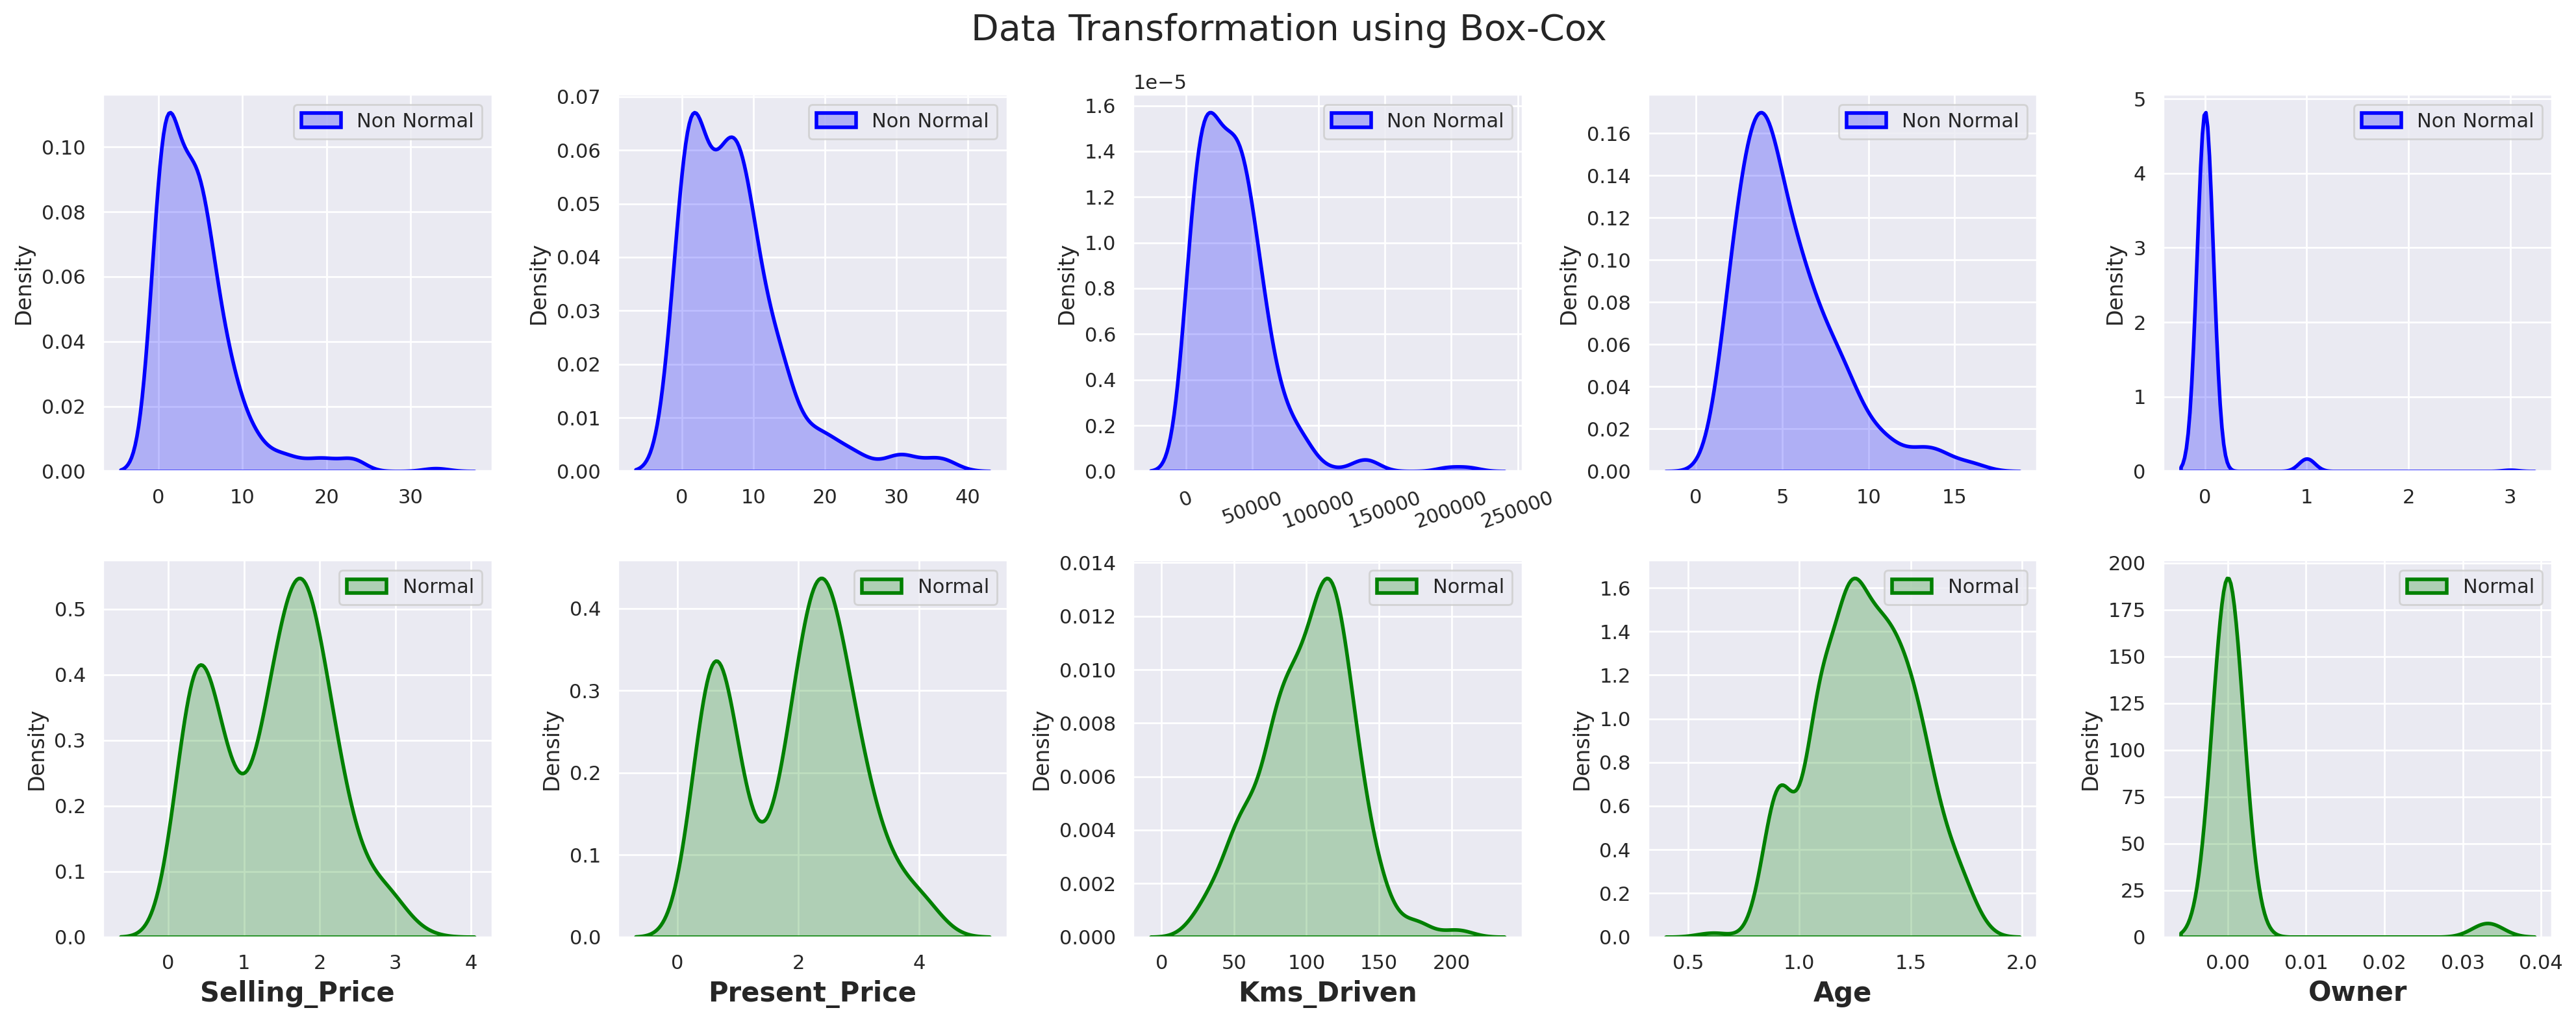

In [266]:
Color = ['blue','green']
flg ,ax = plt.subplots(nrows = 2,ncols = 5 ,figsize = (20,8) ,dpi=200)
Numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age' ,'Owner']

for i ,col in enumerate(Numerical_cols):
    sns.kdeplot(data = df_car[col] ,label = 'Non Normal' ,fill = True ,color = Color[0] ,linewidth = 2 ,ax = ax[0,i])
    sns.kdeplot(data = df_boxcox[col] ,label = 'Normal' ,fill = True ,color = Color[1] ,linewidth = 2 ,ax = ax[1,i])
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")
    
ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()  

In [267]:
X = df_boxcox.drop(labels = 'Selling_Price' ,axis = 'columns')     
y = df_boxcox['Selling_Price']  

In [268]:
print(len(X.columns))
print(y.shape)

7
(299,)


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 17: Build 2nd-order Polynomial Regression.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.1: Create 2nd-order Polynomial Features.  </p>***

In [269]:
Poly_features = PolynomialFeatures(degree = 2 ,include_bias=False)
X_poly = Poly_features.fit_transform(X)
X_poly = pd.DataFrame(data = X_poly ,columns = Poly_features.get_feature_names_out(X.columns))
X_poly.head(3).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Age^2,Age Present_Price,Age Kms_Driven,Age Owner,Age Fule_Type_Diesel,Age Seller_Type_Individual,Age Transmission_Manual,Present_Price^2,Present_Price Kms_Driven,Present_Price Owner,Present_Price Fule_Type_Diesel,Present_Price Seller_Type_Individual,Present_Price Transmission_Manual,Kms_Driven^2,Kms_Driven Owner,Kms_Driven Fule_Type_Diesel,Kms_Driven Seller_Type_Individual,Kms_Driven Transmission_Manual,Owner^2,Owner Fule_Type_Diesel,Owner Seller_Type_Individual,Owner Transmission_Manual,Fule_Type_Diesel^2,Fule_Type_Diesel Seller_Type_Individual,Fule_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
0,1.320187,2.032688,98.846621,0.000000,0.000000,0.000000,1456.437063,1.742893,2.683528,130.496009,0.000000,0.000000,0.000000,1922.769050,4.131820,200.924333,0.000000,0.000000,0.000000,2960.482039,9770.654489,0.000000,0.000000,0.000000,143963.882445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2121208.919236
1,1.398824,2.587658,116.843735,0.000000,0.136232,0.000000,1456.437063,1.956709,3.619679,163.443850,0.000000,0.190565,0.000000,2037.299482,6.695976,302.351663,0.000000,0.352522,0.000000,3768.761487,13652.458394,0.000000,15.917879,0.000000,170175.546173,0.000000,0.000000,0.000000,0.000000,0.018559,0.000000,198.413626,0.000000,0.000000,2121208.919236
2,0.907273,2.622591,60.223854,0.000000,0.000000,0.000000,1456.437063,0.823145,2.379406,54.639487,0.000000,0.000000,0.000000,1321.386272,6.877983,157.942526,0.000000,0.000000,0.000000,3819.638480,3626.912568,0.000000,0.000000,0.000000,87712.252786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2121208.919236


In [270]:
poly_features_names = Poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.2: Split Dataset to Training & Test Sets.  </p>***

In [271]:
X_poly_train ,X_poly_test ,y_poly_train ,y_poly_test = train_test_split(X_poly ,y ,test_size = 0.3 ,random_state=0)

In [272]:
print('X_poly_train shape: ', X_poly_train.shape)
print('X_poly_test shape: ', X_poly_test.shape)
print('y_poly_train shape: ', y_poly_train.shape)
print('y_poly_test shape: ',y_poly_test.shape)

X_poly_train shape:  (209, 35)
X_poly_test shape:  (90, 35)
y_poly_train shape:  (209,)
y_poly_test shape:  (90,)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.3: Scale Data using StandardScaler.  </p>***

In [273]:
Scaler = StandardScaler()
Scaler.fit(X_poly_train)

X_poly_train = Scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(data = X_poly_train ,columns = poly_features_names) 

X_poly_test = Scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(data = X_poly_test ,columns = poly_features_names) 

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.4: Train The Model.  </p>***

In [274]:
Poly_model = LinearRegression()
Poly_model.fit(X_poly_train ,y_poly_train)

LinearRegression()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.5: Show Model Component.  </p>***

In [275]:
Dataframe_poly = pd.DataFrame(data = np.append(Poly_model.intercept_ ,Poly_model.coef_) ,index = ['Intercept']+
            [col+' Coef.' for col in X_poly.columns] , columns = ['Value'])
Dataframe_poly.T

,Intercept,Age Coef.,Present_Price Coef.,Kms_Driven Coef.,Owner Coef.,Fule_Type_Diesel Coef.,Seller_Type_Individual Coef.,Transmission_Manual Coef.,Age^2 Coef.,Age Present_Price Coef.,...,Owner^2 Coef.,Owner Fule_Type_Diesel Coef.,Owner Seller_Type_Individual Coef.,Owner Transmission_Manual Coef.,Fule_Type_Diesel^2 Coef.,Fule_Type_Diesel Seller_Type_Individual Coef.,Fule_Type_Diesel Transmission_Manual Coef.,Seller_Type_Individual^2 Coef.,Seller_Type_Individual Transmission_Manual Coef.,Transmission_Manual^2 Coef.
Value,1.33,0.48,1.23,0.01,0.01,-0.11,-0.02,-0.05,-0.39,-0.67,...,0.01,-0.01,-0.08,-0.06,-0.11,-0.01,-0.01,-0.02,0.06,-0.05


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.6: Model Evaluation.  </p>***

In [276]:
model_evaluate(Poly_model ,X_poly_train ,X_poly_test ,y_poly_train ,y_poly_test ,'Polynomial_Reg')

     Actual  Predicted
206    2.10       2.05
188    0.18      -0.01
12     2.06       1.95
219    1.65       1.52
237    1.08       1.25


,Polynomial_Reg
MAE,0.088163
MSE,0.011432
RMSE,0.106920
R2_score,0.981584
Score_test,98.158389
Score_train,98.817022
Adjusted_r_squared,0.969648


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.7: Model Evaluation Using Cross Validate.  </p>***

In [277]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X ,y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()
MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()
R2_train_mean = result2['train_r2'].mean()
R2_train_std  = result2['train_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean,R2_train_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std,R2_train_std]},
         index=['MAE', 'MSE', 'RMSE' ,'R2-Score','R2_Train']).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Mean,Std
MAE,0.079760,0.009630
MSE,0.011968,0.005638
RMSE,0.106801,0.023696
R2-Score,0.978205,0.010854
R2_Train,0.987286,0.000614


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.8: Polynomial Model Asumption.  </p>***

### ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.8.1: Linearity.  </p>***

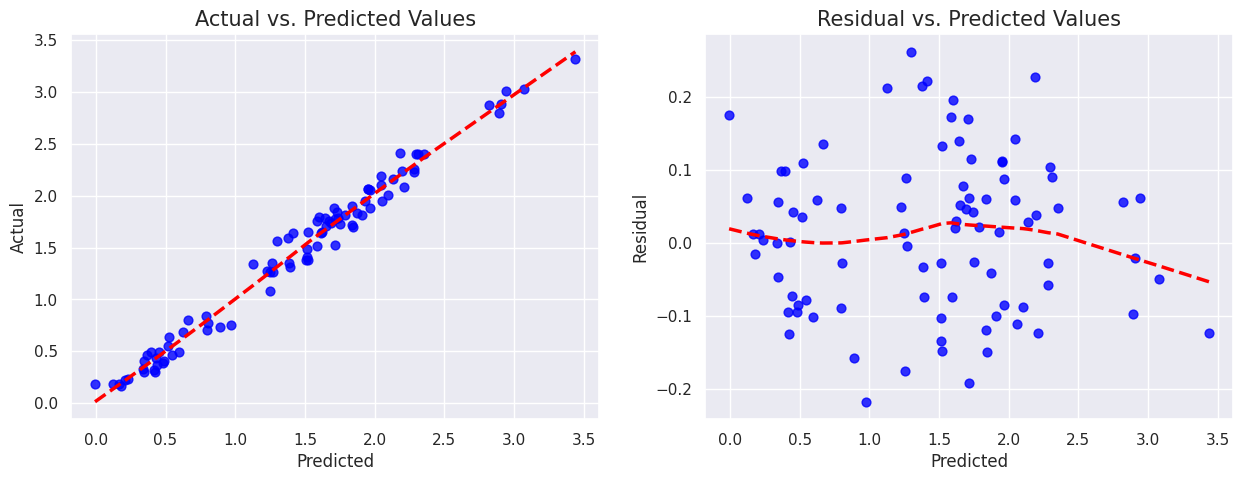

In [278]:
Check_linear_assumption(Poly_model ,X_poly_test ,y_poly_test)

### ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.8.2: Normality.  </p>***

Anderson-Darling Test Statistic:  0.355995
p-value:  4.508434e-01
Check normality assumption using Anderson-Darling test Way 1
The data comes from a normal distribution. Assumption satisfied
Check normality assumption using Anderson-Darling test Way 2
Data seems to come from a normal distribution. Assumption satisfied


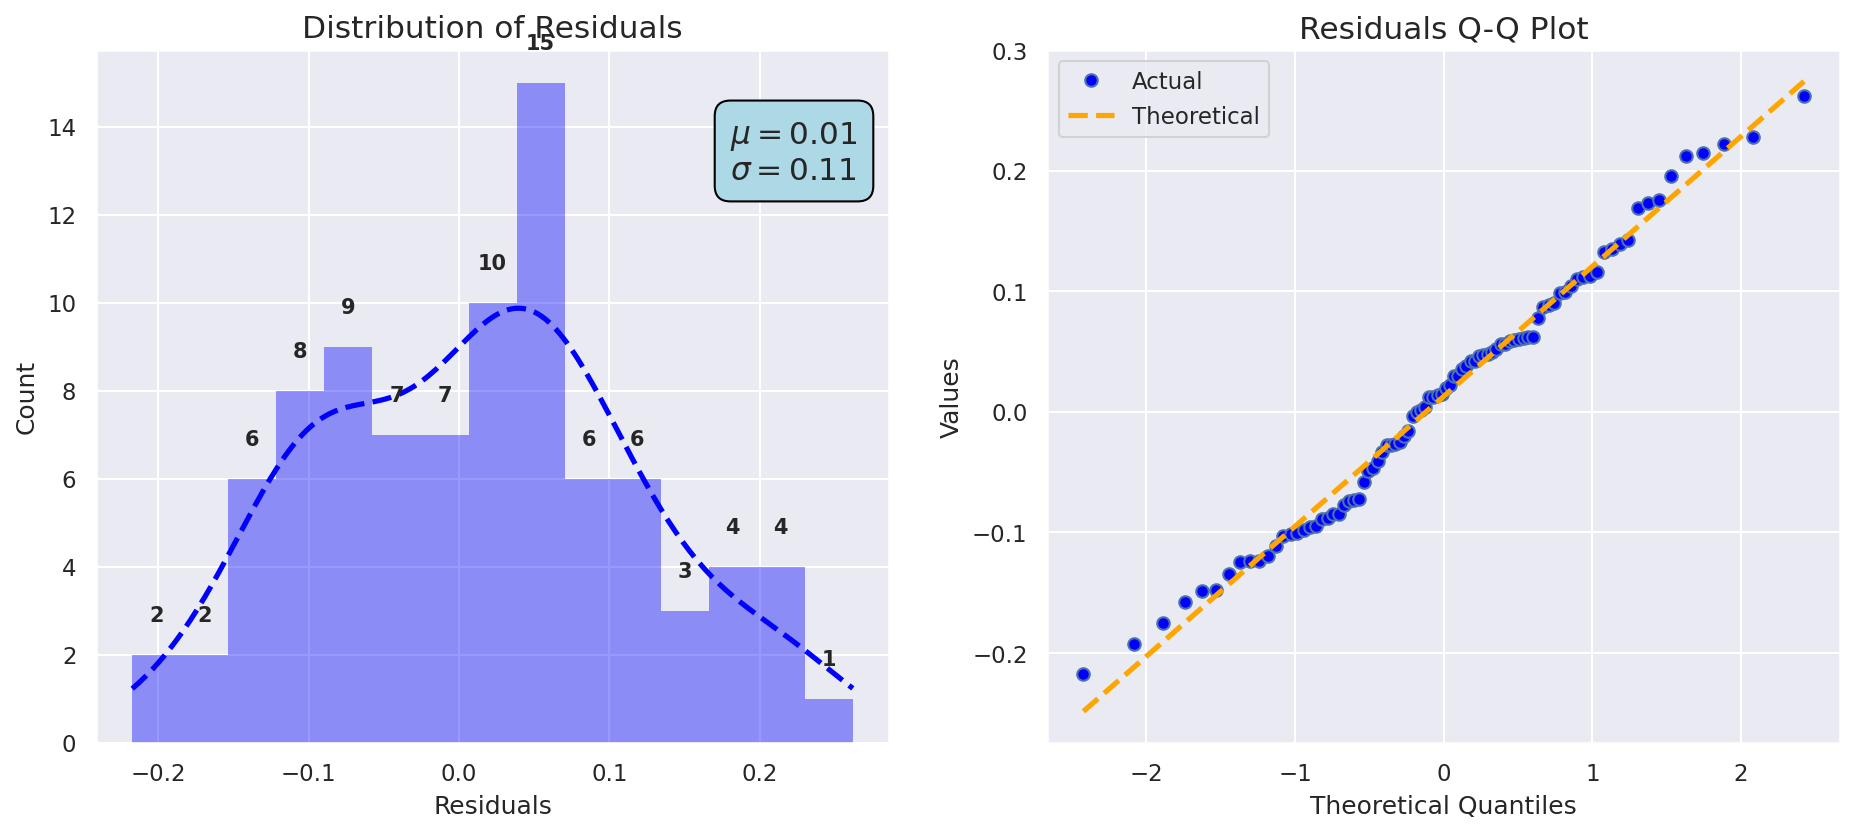

In [279]:
Check_normality_assumption(Poly_model ,X_poly_test ,y_poly_test ,alpha_value=0.05)

### ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.8.3: No Perfect Multicollinearity.  </p>***

In [280]:
Check_Multicollinearity_assumption(X_poly)

33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
High multicollinearity.Assumption not satisfied.

Condition Number value :  5.8244105062074984e+16
High multicollinearity. Assumption not satisfied.



,Features,VIF
0,Age,5900.610000
1,Present_Price,1600.380000
2,Kms_Driven,2718.650000
3,Owner,inf
4,Fule_Type_Diesel,inf
5,Seller_Type_Individual,inf
6,Transmission_Manual,inf
7,Age^2,2291.330000
8,Age Present_Price,1982.970000
9,Age Kms_Driven,2095.330000


### ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.8.4: No Autocorrelation Of Residuals.  </p>***

In [281]:
 Cheack_autocorrelation_assumption(Poly_model ,X_poly_test ,y_poly_test)

Durbin weston test value = 1.83607
No Autocorrelation. Assumption satisfied. 



### ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.8.5: Homoscedasticity.  </p>***

The orange line should be flat.



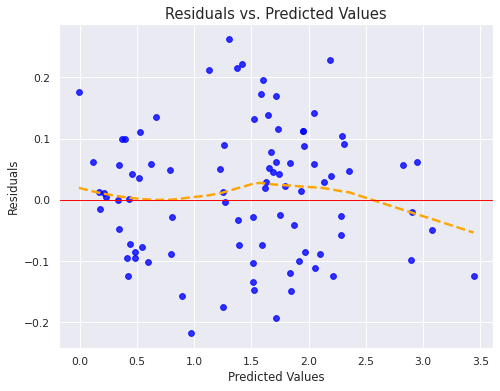



Breusch-Pagan test p-value:  9.159303e-11
Heteroscedasticity detected (variance is not constant).


,const,Age,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual
206,1.000000,0.907273,2.411848,46.558032,0.000000,0.000000,17.041492,0.000000,1456.437063
188,1.000000,1.729461,0.459180,127.616628,0.000000,0.000000,17.041492,0.323577,1456.437063


In [282]:
Cheack_homoscedasticity_assumption(Poly_model ,X_poly_test ,y_poly_test)

***As can be seen, the assumptions have improved slightly compared to the LinearRegression model.***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 17.9: Results Visualization..  </p>***

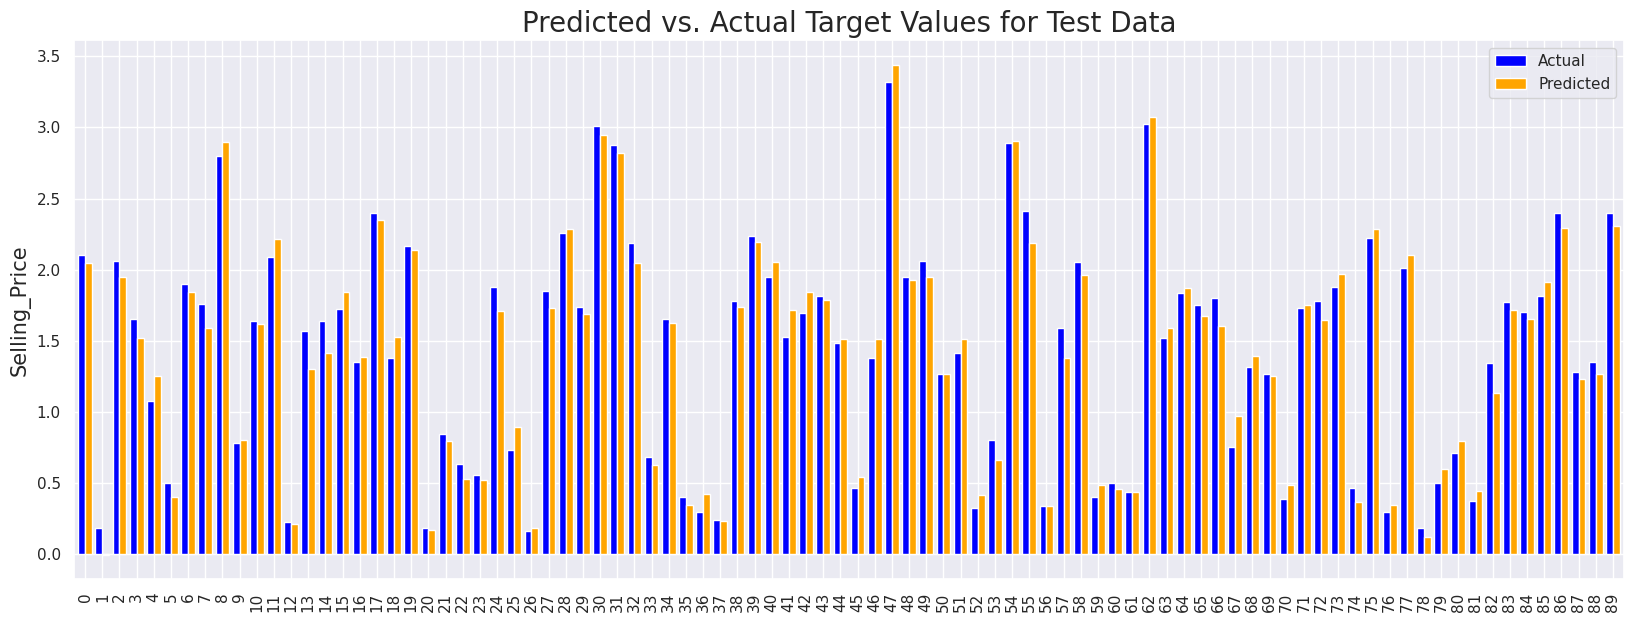

In [286]:
Comparison_predicted_vs_original_data(Poly_model ,X_poly_test ,y_poly_test)

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">📌The difference between the predicted values and the actual values has decreased compared to the original linear model, but on the other hand, almost no negative value is predicted for Selling_Price, which is wonderful!</div>***

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">📌Note : All regression assumptions are satisfied to a good extent except for multicollinearity. But in general, the polynomial model performs better than the linear model on this data set.To reduce multicollinearity effects we can use Regularization.   
L1 Regularization or Lasso Regularization.  
L2 Regularization or Ridge Regularization.</div>

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 18: Conclusion..  </p>***

## 📊 **Conclusion** 

In this project, we explored various techniques and methodologies to achieve **High Accuracy and Best EDA**. The results have demonstrated promising insights, especially in terms of:

- 📈 **Model Accuracy**: Achieving significant predictive accuracy with the **GradientBoostingRegressor** model.
- 🔄 **Data Preprocessing**: Detecting outlier values and performing data scaling effectively.
- 🔍 **Future Improvements**: Exploring more advanced models such as **Stacking & Voting Regression** for further enhancements.

### 🛠 **Next Steps**
We plan to extend this project by:
- Experimenting with **additional machine learning algorithms**.
- Incorporating **feature engineering** techniques.
- Enhancing the overall model performance through **Regularization**.

This is just the beginning of a journey towards more advanced data analysis and modeling. Stay tuned for more updates and improvements in future iterations of this work! 🚀
